## Research Topic - Predictive Modeling in Healthcare Delivery: Optimizing the Logistics Strategy for Distribution HIV/AIDS Commodities Across Africa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})
pd.set_option('display.max_columns', 50)
from wordcloud import WordCloud
import random

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

### Assessing Data

In [2]:
data = pd.read_csv("Supply_Chain_Shipment_Pricing_Data.csv")

In [3]:
# Checking the feature types
print(f"This dataset contains {data.select_dtypes(include=['object']).shape[1]} categorical features and {data.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 25 categorical features and 7 numerical features


In [4]:
data.sample(5)

id project code            pq #   po / so #  asn/dn #   country  \
7707  83609   900-UG-T30       FPQ-10048    SO-42570   DN-2781    Uganda   
1895  11801   109-TZ-T01  Pre-PQ Process      SO-750    DN-390  Tanzania   
9634  85930   151-NG-T30       FPQ-10477    SO-43045   DN-2997   Nigeria   
2510  12672   107-RW-T01  Pre-PQ Process      SO-824    DN-266    Rwanda   
2896  16707   102-KE-T30        FPQ-4591  SCMS-58382  ASN-7490     Kenya   

     managed by  fulfill via vendor inco term shipment mode  \
7707   PMO - US     From RDC   N/A - From RDC           Air   
1895   PMO - US     From RDC   N/A - From RDC           Air   
9634   PMO - US     From RDC   N/A - From RDC   Air Charter   
2510   PMO - US     From RDC   N/A - From RDC           Air   
2896   PMO - US  Direct Drop              EXW           Air   

     pq first sent to client date po sent to vendor date  \
7707                     6/6/2012         N/A - From RDC   
1895               Pre-PQ Process         N/A - From RDC   
9634                     8/9/2012         N/A - From RDC   
2510               Pre-PQ Process         N/A - From RDC   
2896                   11/18/2009              5/27/2010   

     scheduled delivery date delivered to client date delivery recorded date  \
7707               30-Oct-12                30-Oct-12              30-Oct-12   
1895                4-Dec-07                 4-Dec-07               4-Dec-07   
9634               11-Feb-13                11-Feb-13              11-Feb-13   
2510                2-Aug-07                 2-Aug-07               2-Aug-07   
2896               29-Jul-10                29-Jul-10              29-Jul-10   

     product group sub classification         vendor  \
7707           ARV              Adult  SCMS from RDC   
1895          HRDT           HIV test  SCMS from RDC   
9634           ARV              Adult  SCMS from RDC   
2510          HRDT           HIV test  SCMS from RDC   
2896          HRDT           HIV test  Orgenics, Ltd   

                                       item description  \
7707  Lamivudine/Tenofovir Disoproxil Fumarate 300/3...   
1895  HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...   
9634  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
2510  HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Car...   
2896     HIV 1/2, Determine Complete HIV Kit, 100 Tests   

                                     molecule/test type           brand  \
7707           Lamivudine/Tenofovir Disoproxil Fumarate         Generic   
1895  HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary p...         Bioline   
9634                              Lamivudine/Zidovudine         Generic   
2510  HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Car...  First Response   
2896                HIV 1/2, Determine Complete HIV Kit       Determine   

         dosage   dosage form  unit of measure (per pack)  line item quantity  \
7707  300/300mg  Tablet - FDC                          30               39600   
1895        NaN      Test kit                          25                9200   
9634  150/300mg  Tablet - FDC                          60              162827   
2510        NaN      Test kit                          30                2034   
2896        NaN      Test kit                         100                8442   

      line item value  pack price  unit price              manufacturing site  \
7707        219384.00        5.54        0.18  Mylan (formerly Matrix) Nashik   
1895        184000.00       20.00        0.80     Standard Diagnostics, Korea   
9634       1183752.29        7.27        0.12       Aurobindo Unit III, India   
2510         33561.00       16.50        0.55    Premier Med. Corp Ltd. India   
2896        675360.00       80.00        0.80                 Inverness Japan   

      first line designation       weight (kilograms)  \
7707                   False  See DN-2781 (ID#:83061)   
1895                    True                     3327   
9634                   False  See DN-2997 (

In [5]:
data.describe()

id  unit of measure (per pack)  line item quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       line item value    pack price    unit price  line item insurance (usd)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

In [6]:
data.describe(include="object")

project code            pq #    po / so #   asn/dn #       country  \
count         10324           10324        10324      10324         10324   
unique          142            1237         6233       7030            43   
top      116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166  South Africa   
freq            768            2681           67         54          1406   

       managed by fulfill via vendor inco term shipment mode  \
count       10324       10324            10324          9964   
unique          4           2                8             4   
top      PMO - US    From RDC   N/A - From RDC           Air   
freq        10265        5404             5404          6113   

       pq first sent to client date po sent to vendor date  \
count                         10324                  10324   
unique                          765                    897   
top                  Pre-PQ Process         N/A - From RDC   
freq                           2476                   5404   

       scheduled delivery date delivered to client date  \
count                    10324                    10324   
unique                    2006                     2093   
top                  29-Aug-14                29-Aug-14   
freq                        97                       74   

       delivery recorded date product group sub classification         vendor  \
count                   10324         10324              10324          10324   
unique                   2042             5                  6             73   
top                 29-Aug-14           ARV              Adult  SCMS from RDC   
freq                       67          8550               6595           5404   

                         item description molecule/test type    brand dosage  \
count                               10324              10324    10324   8588   
unique                                184                 86       48     54   
top     Efavirenz 600mg, tablets, 30 Tabs          Efavirenz  Generic  300mg   
freq                                  755               1125     7285    990   

       dosage form         manufacturing site          weight (kilograms)  \
count        10324                      10324                       10324   
unique          17                         88                        4688   
top         Tablet  Aurobindo Unit III, India  Weight Captured Separately   
freq          3532                       3172                        1507   

                        freight cost (usd)  
count                                10324  
unique                                6733  
top     Freight Included in Commodity Cost  
freq                                  1442

In [7]:
data['pq first sent to client date'].value_counts()

Pre-PQ Process       2476
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
7/29/2010               1
10/3/2011               1
12/17/2013              1
2/5/2015                1
8/29/2013               1
Name: pq first sent to client date, Length: 765, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [9]:
# Checking for missing values
((data.isnull().sum() / data.shape[0]) *100).sort_values(ascending=False).head(4)

dosage                       16.815188
shipment mode                 3.487021
line item insurance (usd)     2.779930
molecule/test type            0.000000
dtype: float64

It can be observed that 3 of our features have missing values: `line item insurance (usd)`, `dosage`, and `shipment mode`, proceed to fill them

In [10]:
# Dictionary mapping countries to continents
continent_mapping = {
    'Mozambique': 'Africa', 'Zambia': 'Africa', 'South Africa': 'Africa', 'Nigeria': 'Africa', 'Zimbabwe': 'Africa',
    'Uganda': 'Africa', 'Rwanda': 'Africa', 'Malawi': 'Africa', 'Tanzania': 'Africa', 'Ghana': 'Africa', 
    "Côte d'Ivoire": 'Africa', 'Cameroon': 'Africa', 'Haiti': 'North America', 'Ethiopia': 'Africa', 'Vietnam': 'Asia', 
    'Swaziland': 'Africa', 'Benin': 'Africa', 'Congo, DRC': 'Africa', 'South Sudan': 'Africa', 'Namibia': 'Africa', 
    'Dominican Republic': 'North America', 'Botswana': 'Africa', 'Guatemala': 'North America', 'Burundi': 'Africa', 
    'Kenya': 'Africa', 'Libya': 'Africa', 'Togo': 'Africa', 'Guyana': 'South America', 'Pakistan': 'Asia', 
    'Sierra Leone': 'Africa', 'Lesotho': 'Africa', 'Angola': 'Africa', 'Sudan': 'Africa', 'Liberia': 'Africa', 
    'Kyrgyzstan': 'Asia', 'Mali': 'Africa', 'Belize': 'North America', 'Lebanon': 'Asia', 'Burkina Faso': 'Africa', 
    'Senegal': 'Africa', 'Afghanistan': 'Asia', 'Kazakhstan': 'Asia', 'Guinea': 'Africa'
}

# Map the countries to their continents
data['continent'] = data['country'].map(continent_mapping)

In [11]:
# Calculate the percentage of total quantity
data['quantity(%)'] = round((data['line item quantity'] / data['line item quantity'].sum()) * 100, 3)

# Sort by line item quantity before calculating cumulative percentage
data = data.sort_values(by='line item quantity', ascending=True)

# Group by 'continent' and 'country' and sum the required columns
grouped_data = data.groupby(['continent', 'country'])[['line item quantity', 'quantity(%)']].sum()

# Count the number of orders for each country
grouped_data['frequency_supplied'] = data.groupby(['continent', 'country']).size()

# Calculate the cumulative sum of quantity(%) within each continent
grouped_data['cumulative_quantity(%)'] = grouped_data.groupby(level=0)['quantity(%)'].cumsum()

# Calculate the total number of orders
total_orders = grouped_data['frequency_supplied'].sum()

# Calculate the proportion of orders each country received
grouped_data['frequency_proportion(%)'] = (grouped_data['frequency_supplied'] / total_orders) * 100

# Calculate the cumulative sum of quantity(%) within each continent
grouped_data['cumulative_frequency(%)'] = grouped_data.groupby(level=0)['frequency_proportion(%)'].cumsum()

# Sort by continent, line item quantity, and cumulative_quantity(%)
grouped_data = grouped_data.sort_values(by=['continent', 'cumulative_quantity(%)'], ascending=[True, True])

grouped_data

line item quantity  quantity(%)  \
continent     country                                               
Africa        Angola                            3920        0.001   
              Benin                           137349        0.072   
              Botswana                        119532        0.061   
              Burkina Faso                       165        0.000   
              Burundi                         203212        0.102   
              Cameroon                       1790405        0.947   
              Congo, DRC                      518546        0.252   
              Côte d'Ivoire                 11898572        6.272   
              Ethiopia                       2559945        1.356   
              Ghana                          1296566        0.680   
              Guinea                              50        0.000   
              Kenya                           570631        0.309   
              Lesotho                           4618        0.002   
              Liberia                           1455        0.000   
              Libya                            27251        0.013   
              Malawi                          501640        0.264   
              Mali                              1941        0.000   
              Mozambique                    19252134       10.152   
              Namibia                         613658        0.319   
              Nigeria                       33967950       17.938   
              Rwanda                         8855350        4.671   
              Senegal                            280        0.000   
              Sierra Leone                      6400        0.003   
              South Africa                  22995781       12.115   
              South Sudan                     190183        0.086   
              Sudan                             5565        0.001   
              Swaziland                       515554        0.272   
              Tanzania                      12482994        6.581   
              Togo                             13282        0.007   
              Uganda                        11914117        6.279   
              Zambia                        28627539       15.116   
              Zimbabwe                      17407714        9.186   
Asia          Afghanistan                        115        0.000   
              Kazakhstan                         100        0.000   
              Kyrgyzstan                        1000        0.000   
              Lebanon                            936        0.000   
              Pakistan                         18106        0.008   
              Vietnam                        7104544        3.736   
North America Belize                             300        0.000   
              Dominican Republic              188139        0.097   
              Guatemala                        55467        0.027   
              Haiti                          5225980        2.743   
South America Guyana                          186104        0.084   

                                  frequency_supplied  cumulative_quantity(%)  \
continent     country                                                          
Africa        Angola                               7                   0.001   
              Benin                               13                   0.073   
              Botswana                            70                   0.134   
              Burkina Faso                         2                   0.134   
              Burundi                             98                   0.236   
              Cameroon                            75                   1.183   
              Congo, DRC                         333                   1.435   
              Côte d'Ivoire                     1083                   7.707   
              Ethiopia                           216                   9.063   
              Ghana                             

In [13]:
# Group by 'continent' and sum the required columns
grouped_data2 = grouped_data.groupby('continent').agg({'frequency_supplied': 'sum', 'frequency_proportion(%)': 'sum'})

# Count the number of unique countries in each continent
grouped_data2['num_countries'] = data.groupby('continent')['country'].nunique()

grouped_data2.reset_index(inplace=True)

# Rearrange columns as per requirement
grouped_data2 = grouped_data2[['continent', 'frequency_supplied',  'frequency_proportion(%)', 'num_countries',]]

grouped_data2

continent  frequency_supplied  frequency_proportion(%)  num_countries
0         Africa                8646                83.746610             32
1           Asia                 718                 6.954669              6
2  North America                 723                 7.003100              4
3  South America                 237                 2.295622              1

In [14]:
data['country'].unique()

array(['South Africa', 'Nigeria', 'Kenya', 'Namibia', 'Zimbabwe', 'Sudan',
       'Botswana', 'Mozambique', 'Congo, DRC', 'Dominican Republic',
       "Côte d'Ivoire", 'Haiti', 'Uganda', 'Tanzania', 'Mali', 'Guyana',
       'Vietnam', 'Lesotho', 'Ethiopia', 'Pakistan', 'South Sudan',
       'Burundi', 'Malawi', 'Liberia', 'Cameroon', 'Zambia', 'Lebanon',
       'Burkina Faso', 'Afghanistan', 'Rwanda', 'Swaziland', 'Kazakhstan',
       'Guinea', 'Guatemala', 'Senegal', 'Ghana', 'Libya', 'Angola',
       'Benin', 'Togo', 'Belize', 'Sierra Leone', 'Kyrgyzstan'],
      dtype=object)

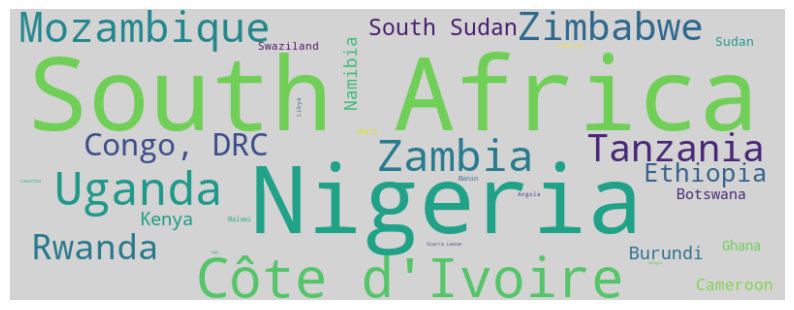

In [15]:
# Create a word cloud from the countries in the Africa continent
africa_countries = data[data['continent'] == 'Africa']['country']
word_frequencies = africa_countries.value_counts().to_dict()

wordcloud = WordCloud(width=800, height=300, background_color='lightgray').generate_from_frequencies(word_frequencies)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the word cloud image
plt.savefig("Africa_Countries.png", dpi=150)

### Cleaning

In [16]:
# Formatting column name properly
data.columns = [col.replace(' ', '_') for col in data.columns]
data.rename(columns=lambda x: x.replace("(", "").replace(")", "").replace("#", ""), inplace=True)

In [17]:
data.columns

Index(['id', 'project_code', 'pq_', 'po_/_so_', 'asn/dn_', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'line_item_insurance_usd', 'continent', 'quantity%'],
      dtype='object')

In [18]:
mask = data["weight_kilograms"].str.contains("See")
mask_2 = data["weight_kilograms"] == "Weight Captured Separately" 
mask_3 = data["weight_kilograms"] == "0"
mask_4 = data["freight_cost_usd"] == "Invoiced Separately"
mask_5 = data['pq_first_sent_to_client_date'] == "Pre-PQ Process"
mask_6 = data['pq_first_sent_to_client_date'] == "Date Not Captured"
mask_7 = data['continent'] != "Africa"
data = data[~mask & ~mask_2 & ~mask_3 & ~mask_4 & ~mask_5 & ~mask_6 & ~mask_7]
data.shape

(4024, 35)

In [19]:
data.head()

id project_code        pq_     po_/_so_    asn/dn_  country  \
4925  53064   102-KE-T30   FPQ-6406   SCMS-88211   ASN-9550    Kenya   
3054  19958   103-KE-T30  FPQ-10018  SCMS-149610  ASN-15368    Kenya   
3312  24192   102-KE-T30   FPQ-6406   SCMS-88211   ASN-9549    Kenya   
2682  12929   102-KE-T30   FPQ-4587   SCMS-58380   ASN-5901    Kenya   
3189  22191   112-NG-T30   FPQ-3635   SCMS-48420   ASN-4850  Nigeria   

     managed_by  fulfill_via vendor_inco_term shipment_mode  \
4925   PMO - US  Direct Drop              EXW           Air   
3054   PMO - US  Direct Drop              EXW           Air   
3312   PMO - US  Direct Drop              EXW           Air   
2682   PMO - US  Direct Drop              EXW           Air   
3189   PMO - US  Direct Drop              CIP           Air   

     pq_first_sent_to_client_date po_sent_to_vendor_date  \
4925                    9/27/2010             11/22/2010   
3054                     6/5/2012              6/14/2012   
3312                    9/27/2010             11/22/2010   
2682                   11/18/2009              12/2/2009   
3189                     5/8/2009               8/5/2009   

     scheduled_delivery_date delivered_to_client_date delivery_recorded_date  \
4925               10-Feb-11                10-Feb-11              10-Feb-11   
3054                9-Jul-12                 9-Jul-12               9-Jul-12   
3312               10-Feb-11                10-Feb-11              10-Feb-11   
2682               16-Feb-10                19-Feb-10              19-Feb-10   
3189               23-Sep-09                23-Sep-09              23-Sep-09   

     product_group sub_classification  \
4925          HRDT           HIV test   
3054          HRDT           HIV test   
3312          HRDT           HIV test   
2682          HRDT           HIV test   
3189          HRDT           HIV test   

                                            vendor  \
4925                                 Orgenics, Ltd   
3054                                 Orgenics, Ltd   
3312                                 Orgenics, Ltd   
2682                                 Orgenics, Ltd   
3189  BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)   

                                    item_description  \
4925  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3054  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3312  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2682  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3189         HIV 2, New LAV Blot 2 HIV Kit, 18 Tests   

                       molecule/test_type      brand dosage dosage_form  \
4925  HIV 1/2, Determine Complete HIV Kit  Determine    NaN    Test kit   
3054  HIV 1/2, Determine Complete HIV Kit  Determine    NaN    Test kit   
3312  HIV 1/2, Determine Complete HIV Kit  Determine    NaN    Test kit   
2682  HIV 1/2, Determine Complete HIV Kit  Determine    NaN    Test kit   
3189        HIV 2, New LAV Blot 2 HIV Kit        LAV    NaN    Test kit   

      unit_of_measure_per_pack  line_item_quantity  line_item_value  \
4925                       100                   1            89.00   
3054                       100                   1            89.00   
3312                       100                   1            89.00   
2682                       100                   1            80.00   
3189                        18                   1           750.29   

      pack_price  unit_price       manufacturing_site  first_line_designation  \
4925       89.00        0.89          Inverness Japan                    True   
3054       89.00        0.89  Alere Medical Co., Ltd.                    True   
3312       89.00        0.89          Inverness Japan                    True   
2682       80.00        0.80          Inverness Japan                    True   
3189      750.29       41.68     Bio-Rad Laboratories                    True   

     weight_kilograms                    freight_cost_usd  \
4925             137

In [20]:
# Rename varaible in transport mode column
data['shipment_mode'] = data['shipment_mode'].replace('Truck', 'Road (Truck)')

In [21]:
((data.isnull().sum() / data.shape[0]) *100).sort_values(ascending=False).head()

dosage         21.66998
id              0.00000
pack_price      0.00000
brand           0.00000
dosage_form     0.00000
dtype: float64

<Axes: >

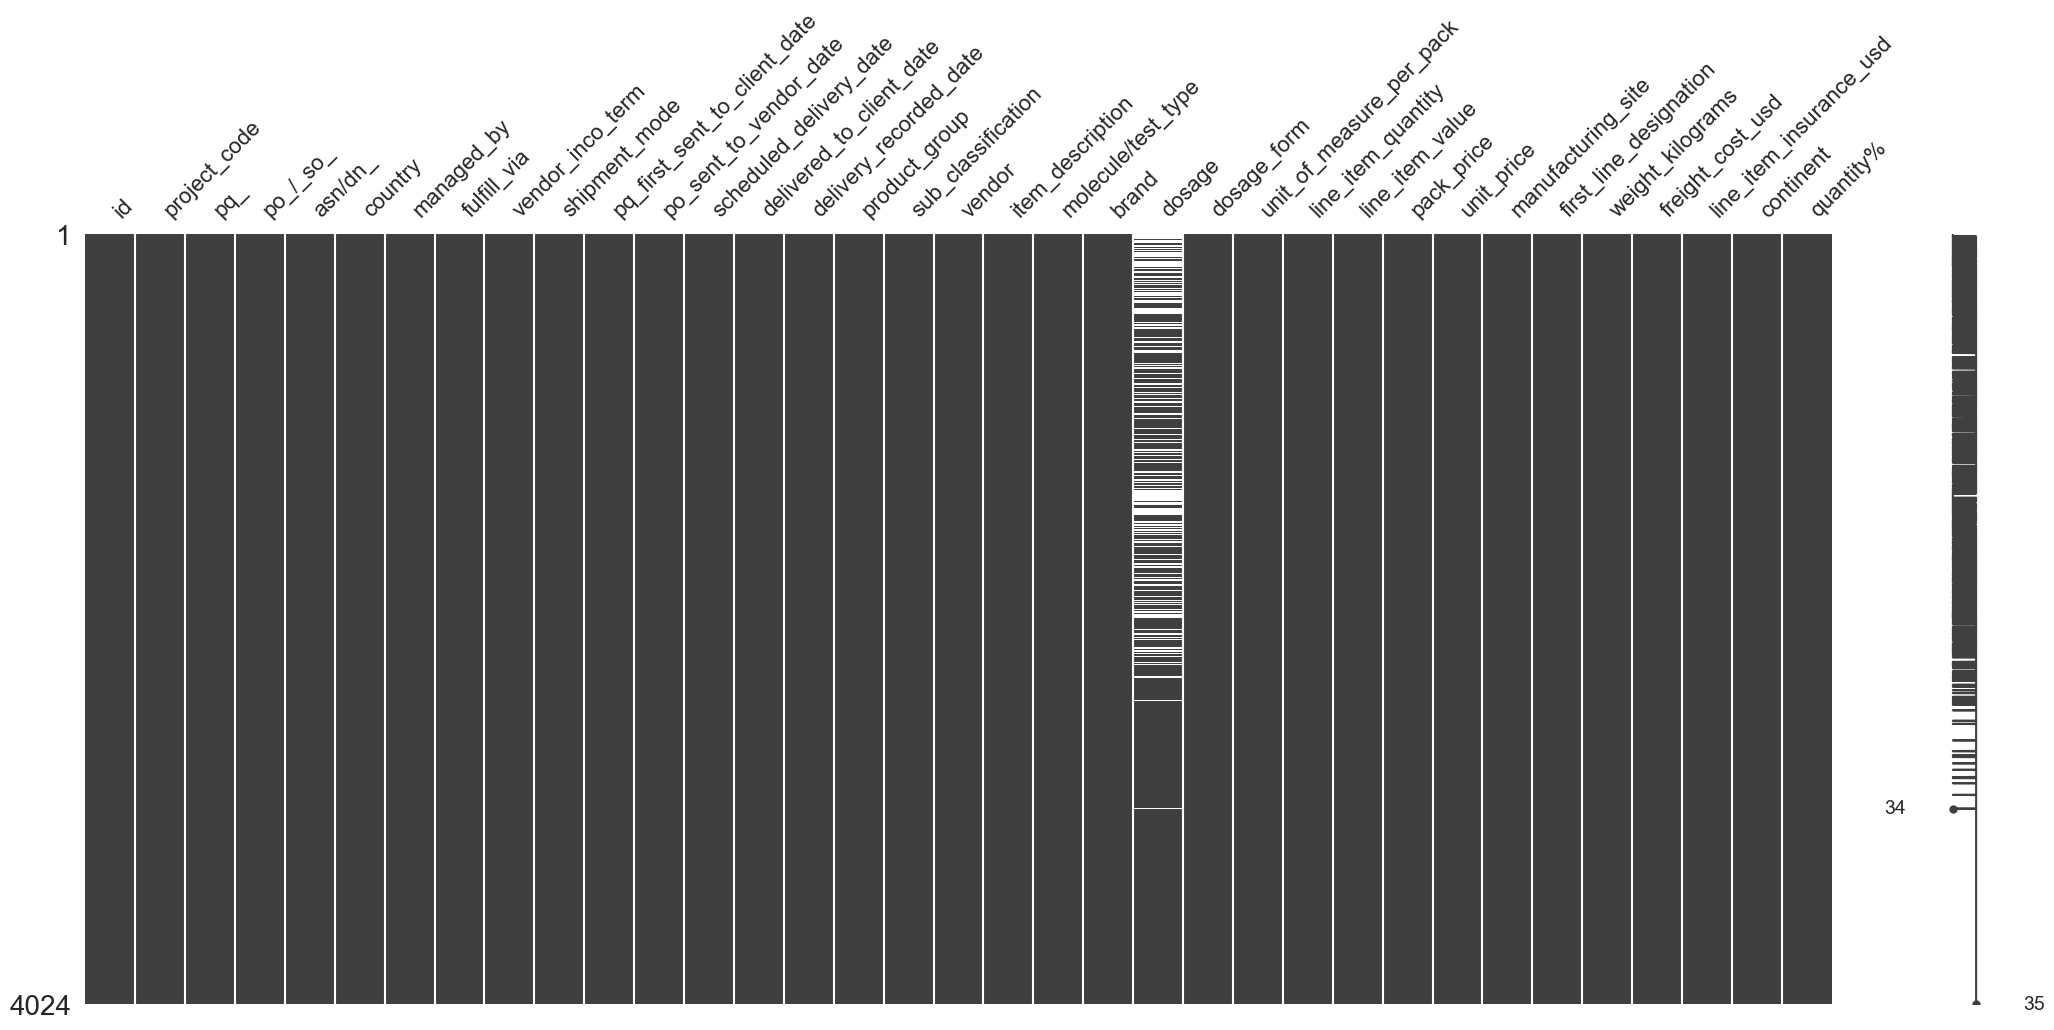

In [22]:
import missingno as msno

# Visualize missing data
msno.matrix(data)

In [23]:
# Forward fill, then backward fill for the 'dosage' column
data['dosage'] = data['dosage'].fillna(method='ffill').fillna(method='bfill')
# ((data.isnull().sum() / data.shape[0]) *100).sort_values(ascending=False).head(3)

In [24]:
data["freight_cost_usd"] = data["freight_cost_usd"].replace("Freight Included in Commodity Cost", 0)

In [25]:
data["freight_cost_usd"] = data["freight_cost_usd"].astype("float")
data["weight_kilograms"] = data["weight_kilograms"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 4925 to 7919
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4024 non-null   int64  
 1   project_code                  4024 non-null   object 
 2   pq_                           4024 non-null   object 
 3   po_/_so_                      4024 non-null   object 
 4   asn/dn_                       4024 non-null   object 
 5   country                       4024 non-null   object 
 6   managed_by                    4024 non-null   object 
 7   fulfill_via                   4024 non-null   object 
 8   vendor_inco_term              4024 non-null   object 
 9   shipment_mode                 4024 non-null   object 
 10  pq_first_sent_to_client_date  4024 non-null   object 
 11  po_sent_to_vendor_date        4024 non-null   object 
 12  scheduled_delivery_date       4024 non-null   object 
 13  

### Preprocessing

In [26]:
# Convert Transaction Date and Time column to datetime data type
data["scheduled_delivery_date"] = pd.to_datetime(data["scheduled_delivery_date"])
data["delivered_to_client_date"] = pd.to_datetime(data["delivered_to_client_date"])
data["delivery_recorded_date"] = pd.to_datetime(data["delivery_recorded_date"])
data['pq_first_sent_to_client_date'] = pd.to_datetime(data['pq_first_sent_to_client_date'])
# data["po_sent_to_vendor_date"] = pd.to_datetime(data["po_sent_to_vendor_date"])

In [27]:
from dateutil.relativedelta import relativedelta
data["delivery_status"] = data["scheduled_delivery_date"] - data["delivered_to_client_date"] 
data["delivery_status"]= data["delivery_status"]/np.timedelta64(1,'D')

In [28]:
data["order_to_delivery_days"] = data["delivered_to_client_date"] - data['pq_first_sent_to_client_date'] 
data["order_to_delivery_days"] = data["order_to_delivery_days"] / np.timedelta64(1,'D')
data["order_to_delivery_days"] = np.ceil(data["order_to_delivery_days"]).astype(int)

In [29]:
data.head()

id project_code        pq_     po_/_so_    asn/dn_  country  \
4925  53064   102-KE-T30   FPQ-6406   SCMS-88211   ASN-9550    Kenya   
3054  19958   103-KE-T30  FPQ-10018  SCMS-149610  ASN-15368    Kenya   
3312  24192   102-KE-T30   FPQ-6406   SCMS-88211   ASN-9549    Kenya   
2682  12929   102-KE-T30   FPQ-4587   SCMS-58380   ASN-5901    Kenya   
3189  22191   112-NG-T30   FPQ-3635   SCMS-48420   ASN-4850  Nigeria   

     managed_by  fulfill_via vendor_inco_term shipment_mode  \
4925   PMO - US  Direct Drop              EXW           Air   
3054   PMO - US  Direct Drop              EXW           Air   
3312   PMO - US  Direct Drop              EXW           Air   
2682   PMO - US  Direct Drop              EXW           Air   
3189   PMO - US  Direct Drop              CIP           Air   

     pq_first_sent_to_client_date po_sent_to_vendor_date  \
4925                   2010-09-27             11/22/2010   
3054                   2012-06-05              6/14/2012   
3312                   2010-09-27             11/22/2010   
2682                   2009-11-18              12/2/2009   
3189                   2009-05-08               8/5/2009   

     scheduled_delivery_date delivered_to_client_date delivery_recorded_date  \
4925              2011-02-10               2011-02-10             2011-02-10   
3054              2012-07-09               2012-07-09             2012-07-09   
3312              2011-02-10               2011-02-10             2011-02-10   
2682              2010-02-16               2010-02-19             2010-02-19   
3189              2009-09-23               2009-09-23             2009-09-23   

     product_group sub_classification  \
4925          HRDT           HIV test   
3054          HRDT           HIV test   
3312          HRDT           HIV test   
2682          HRDT           HIV test   
3189          HRDT           HIV test   

                                            vendor  \
4925                                 Orgenics, Ltd   
3054                                 Orgenics, Ltd   
3312                                 Orgenics, Ltd   
2682                                 Orgenics, Ltd   
3189  BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)   

                                    item_description  \
4925  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3054  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3312  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2682  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3189         HIV 2, New LAV Blot 2 HIV Kit, 18 Tests   

                       molecule/test_type      brand dosage dosage_form  \
4925  HIV 1/2, Determine Complete HIV Kit  Determine  150mg    Test kit   
3054  HIV 1/2, Determine Complete HIV Kit  Determine  150mg    Test kit   
3312  HIV 1/2, Determine Complete HIV Kit  Determine  150mg    Test kit   
2682  HIV 1/2, Determine Complete HIV Kit  Determine  150mg    Test kit   
3189        HIV 2, New LAV Blot 2 HIV Kit        LAV  150mg    Test kit   

      unit_of_measure_per_pack  line_item_quantity  line_item_value  \
4925                       100                   1            89.00   
3054                       100                   1            89.00   
3312                       100                   1            89.00   
2682                       100                   1            80.00   
3189                        18                   1           750.29   

      pack_price  unit_price       manufacturing_site  first_line_designation  \
4925       89.00        0.89          Inverness Japan                    True   
3054       89.00        0.89  Alere Medical Co., Ltd.                    True   
3312       89.00        0.89          Inverness Japan                    True   
2682       80.00        0.80          Inverness Japan                    True   
3189      750.29       41.68     Bio-Rad Laboratories                    True   

      weight_kilograms  freight_cost_usd  line_item_insurance_usd continent  \
49

In [30]:
conditions = [
    data["delivery_status"] < 0.0,
    data["delivery_status"] == 0.0,
    data["delivery_status"] > 0.0
]

choices = ["delayed", "ontime", "early_delivery"]
data["delivery_status"] = np.select(conditions, choices, default=None)

In [31]:
round(data["delivery_status"].value_counts(normalize=True)*100,2)

ontime            46.87
early_delivery    36.21
delayed           16.92
Name: delivery_status, dtype: float64

In [32]:
# Dropping identifiers and text features)
data.drop(columns=['id', 'project_code', 'pq_', 'po_/_so_', 'asn/dn_',  'po_sent_to_vendor_date'], inplace=True)

In [33]:
# Check duplicated rows
data.duplicated().sum()

16

In [34]:
data.drop_duplicates(inplace=True)

In [35]:
data.rename(columns={'country': 'country', 'managed_by': 'manager', 'fulfill_via': 'delivery_method',
                   'vendor_inco_term': 'vendor_terms', 'shipment_mode': 'transport_mode', 'pq_first_sent_to_client_date': 'order_date','scheduled_delivery_date': 'expected_date',
                   'delivered_to_client_date': 'actual_date', 'delivery_recorded_date': 'recorded_date', 'product_group': 'product_category', 
                   'sub_classification': 'product_type', 'vendor': 'supplier','item_description': 'product_feature', 
                   'molecule/test_type': 'product_name', 'brand': 'product_brand', 'dosage': 'dosage', 'dosage_form': 'dosage_form',
                   'unit_of_measure_per_pack': 'units_per_pack', 'line_item_quantity': 'total_quantity','line_item_value': 'total_value', 
                   'pack_price': 'pack_price', 'unit_price': 'unit_price', 'manufacturing_site': 'factory_location', 
                   'first_line_designation': 'priority_status','weight_kilograms': 'total_weight', 'freight_cost_usd': 'shipping_cost', 
                   'line_item_insurance_usd': 'insurance_cost', 'delivery_status': 'delivery_status'}, inplace=True
         )

In [36]:
# Grouping features into category
product_feat = ['product_category', 'product_type', 'supplier', 'product_name', 'product_feature', 'product_brand', 'dosage',
                   'dosage_form', 'units_per_pack']

qty_value_feat = ['total_quantity','total_value', 'pack_price', 'unit_price']

manufacture_designation = ['factory_location', 'first_line_designation']

logistics_feat = ['total_weight', 'shipping_cost','insurance_cost']

shipment_feat = ['manager', 'delivery_method', 'vendor_terms', 'transport_mode']

date_feat = ['expected_date', 'actual_date', 'recorded_date']

In [37]:
cat_feat = data.select_dtypes(include=['object', 'bool'])
cat_feat_unique = cat_feat.nunique()
cat_feat_unique

country              31
manager               1
delivery_method       2
vendor_terms          8
transport_mode        4
product_category      4
product_type          6
supplier             37
product_feature     126
product_name         64
product_brand        35
dosage               44
dosage_form          14
factory_location     50
priority_status       1
continent             1
delivery_status       3
dtype: int64

In [38]:
num_data = data.select_dtypes(include=['float', 'int'])
num_data_unique = num_data.nunique()
num_data_unique

units_per_pack              25
total_quantity            2751
total_value               3613
pack_price                 466
unit_price                 112
total_weight              2642
shipping_cost             3275
insurance_cost            3494
quantity%                  146
order_to_delivery_days     422
dtype: int64

In [39]:
# Checking the feature types
print(f"""For this analysis there are `{data.select_dtypes(include=['object']).shape[1]}` categorical features, `{data.select_dtypes(include=['int', 'float']).shape[1]}` numerical features and `{data.select_dtypes(include=['datetime64[ns]']).shape[1]}` datetime features""")

For this analysis there are `16` categorical features, `10` numerical features and `4` datetime features


In [40]:
data.describe(include="all")

country   manager delivery_method    vendor_terms transport_mode  \
count      4008      4008            4008            4008           4008   
unique       31         1               2               8              4   
top     Nigeria  PMO - US        From RDC  N/A - From RDC            Air   
freq        648      4008            2140            2140           2302   
first       NaN       NaN             NaN             NaN            NaN   
last        NaN       NaN             NaN             NaN            NaN   
mean        NaN       NaN             NaN             NaN            NaN   
std         NaN       NaN             NaN             NaN            NaN   
min         NaN       NaN             NaN             NaN            NaN   
25%         NaN       NaN             NaN             NaN            NaN   
50%         NaN       NaN             NaN             NaN            NaN   
75%         NaN       NaN             NaN             NaN            NaN   
max         NaN       NaN             NaN             NaN            NaN   

                 order_date        expected_date          actual_date  \
count                  4008                 4008                 4008   
unique                  627                 1190                 1282   
top     2009-11-06 00:00:00  2010-04-19 00:00:00  2010-06-28 00:00:00   
freq                     95                   52                   54   
first   2009-02-26 00:00:00  2009-07-30 00:00:00  2009-07-09 00:00:00   
last    2015-07-01 00:00:00  2015-12-31 00:00:00  2015-08-25 00:00:00   
mean                    NaN                  NaN                  NaN   
std                     NaN                  NaN                  NaN   
min                     NaN                  NaN                  NaN   
25%                     NaN                  NaN                  NaN   
50%                     NaN                  NaN                  NaN   
75%                     NaN                  NaN                  NaN   
max                     NaN                  NaN                  NaN   

              recorded_date product_category product_type       supplier  \
count                  4008             4008         4008           4008   
unique                 1234                4            6             37   
top     2010-06-28 00:00:00              ARV        Adult  SCMS from RDC   
freq                     54             3134         2435           2140   
first   2009-07-09 00:00:00              NaN          NaN            NaN   
last    2015-09-03 00:00:00              NaN          NaN            NaN   
mean                    NaN              NaN          NaN            NaN   
std                     NaN              NaN          NaN            NaN   
min                     NaN              NaN          NaN            NaN   
25%                     NaN              NaN          NaN            NaN   
50%                     NaN              NaN          NaN            NaN   
75%                     NaN              NaN          NaN            NaN   
max                     NaN              NaN          NaN            NaN   

                                       product_feature  \
count                                             4008   
unique                                             126   
top     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
freq                                               407   
first                                              NaN   
last                                               NaN   
mean                                               NaN   
std                                                NaN   
min                                                NaN   
25%                                                NaN   
50%                                                NaN   
75%                                                NaN   
max                                                NaN   

                               product_nam

In [41]:
# Dropping rows with wrong order date
mask = data['order_to_delivery_days'].isin([-180, -85, -13, -1])
data = data[~mask]
data.describe()

units_per_pack  total_quantity   total_value   pack_price   unit_price  \
count     4005.000000     4005.000000  4.005000e+03  4005.000000  4005.000000   
mean        73.862672    27622.417728  2.355577e+05    22.134185     0.629398   
std         74.367712    50856.147402  4.322259e+05    46.982022     2.510703   
min          1.000000        1.000000  0.000000e+00     0.000000     0.000000   
25%         30.000000     1500.000000  1.467720e+04     4.250000     0.090000   
50%         60.000000     6500.000000  7.769496e+04     8.550000     0.160000   
75%        100.000000    32660.000000  2.637854e+05    24.500000     0.530000   
max       1000.000000   619999.000000  5.951990e+06  1250.000000    41.680000   

        total_weight  shipping_cost  insurance_cost    quantity%  \
count    4005.000000    4005.000000     4005.000000  4005.000000   
mean     4123.598752   12638.141149      347.357573     0.014581   
std      8339.231566   17662.341473      609.927698     0.026880   
min         1.000000       0.000000        0.000000     0.000000   
25%       294.000000    2211.220000       21.160000     0.001000   
50%      1309.000000    6773.130000      114.250000     0.003000   
75%      4395.000000   16769.430000      391.070000     0.017000   
max    154780.000000  289653.200000     7005.490000     0.328000   

       order_to_delivery_days  
count             4005.000000  
mean               164.852434  
std                 86.001324  
min                  3.000000  
25%                103.000000  
50%                150.000000  
75%                212.000000  
max                706.000000

In [42]:
data.head()

country   manager delivery_method vendor_terms transport_mode  \
4925    Kenya  PMO - US     Direct Drop          EXW            Air   
3054    Kenya  PMO - US     Direct Drop          EXW            Air   
3312    Kenya  PMO - US     Direct Drop          EXW            Air   
2682    Kenya  PMO - US     Direct Drop          EXW            Air   
3189  Nigeria  PMO - US     Direct Drop          CIP            Air   

     order_date expected_date actual_date recorded_date product_category  \
4925 2010-09-27    2011-02-10  2011-02-10    2011-02-10             HRDT   
3054 2012-06-05    2012-07-09  2012-07-09    2012-07-09             HRDT   
3312 2010-09-27    2011-02-10  2011-02-10    2011-02-10             HRDT   
2682 2009-11-18    2010-02-16  2010-02-19    2010-02-19             HRDT   
3189 2009-05-08    2009-09-23  2009-09-23    2009-09-23             HRDT   

     product_type                                      supplier  \
4925     HIV test                                 Orgenics, Ltd   
3054     HIV test                                 Orgenics, Ltd   
3312     HIV test                                 Orgenics, Ltd   
2682     HIV test                                 Orgenics, Ltd   
3189     HIV test  BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)   

                                     product_feature  \
4925  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3054  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3312  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
2682  HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3189         HIV 2, New LAV Blot 2 HIV Kit, 18 Tests   

                             product_name product_brand dosage dosage_form  \
4925  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
3054  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
3312  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
2682  HIV 1/2, Determine Complete HIV Kit     Determine  150mg    Test kit   
3189        HIV 2, New LAV Blot 2 HIV Kit           LAV  150mg    Test kit   

      units_per_pack  total_quantity  total_value  pack_price  unit_price  \
4925             100               1        89.00       89.00        0.89   
3054             100               1        89.00       89.00        0.89   
3312             100               1        89.00       89.00        0.89   
2682             100               1        80.00       80.00        0.80   
3189              18               1       750.29      750.29       41.68   

             factory_location  priority_status  total_weight  shipping_cost  \
4925          Inverness Japan             True        1370.0       14515.01   
3054  Alere Medical Co., Ltd.             True         985.0       11034.01   
3312          Inverness Japan             True         800.0        8826.00   
2682          Inverness Japan             True        1028.0       10083.69   
3189     Bio-Rad Laboratories             True          18.0           0.00   

      insurance_cost continent  quantity% delivery_status  \
4925            0.19    Africa        0.0          ontime   
3054            0.12    Africa        0.0          ontime   
3312            0.19    Africa        0.0          ontime   
2682            0.17    Africa        0.0         delayed   
3189            1.47    Africa        0.0          ontime   

      order_to_delivery_days  
4925                     136  
3054                      34  
3312                     136  
2682                      93  
3189                     138

In [43]:
df = data[["country", "factory_location"]]

In [44]:
# data["factory_location"].unique()

## Univariate Analysis

#### Countries

In [45]:
data.columns

Index(['country', 'manager', 'delivery_method', 'vendor_terms',
       'transport_mode', 'order_date', 'expected_date', 'actual_date',
       'recorded_date', 'product_category', 'product_type', 'supplier',
       'product_feature', 'product_name', 'product_brand', 'dosage',
       'dosage_form', 'units_per_pack', 'total_quantity', 'total_value',
       'pack_price', 'unit_price', 'factory_location', 'priority_status',
       'total_weight', 'shipping_cost', 'insurance_cost', 'continent',
       'quantity%', 'delivery_status', 'order_to_delivery_days'],
      dtype='object')

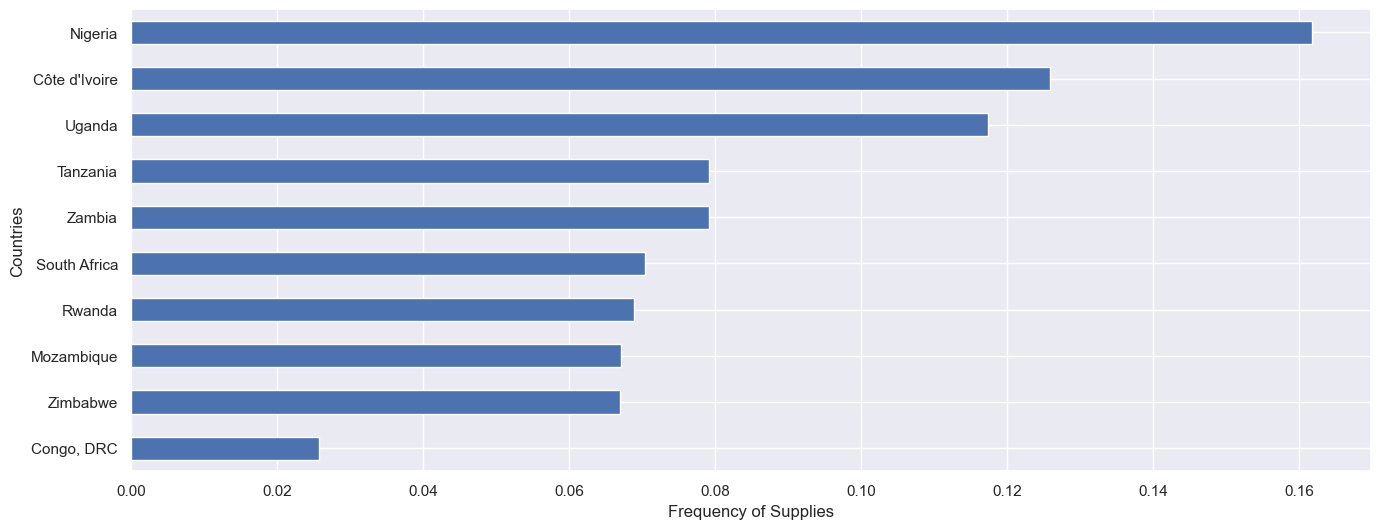

In [46]:
# Plot of Countries
data['country'].value_counts(normalize=True).sort_values(ascending=True).tail(10).plot(kind='barh',xlabel='Frequency of Supplies', ylabel='Countries');
plt.savefig("Frequency_of_Orders_for_Top_10 _Countries.png", dpi=150)

In [54]:
round(data['country'].value_counts(normalize=True).sort_values(ascending=False) * 100, 2)

Nigeria          16.18
Côte d'Ivoire    12.58
Uganda           11.74
Tanzania          7.92
Zambia            7.92
South Africa      7.04
Rwanda            6.89
Mozambique        6.72
Zimbabwe          6.69
Congo, DRC        2.57
Ethiopia          2.12
Kenya             1.72
South Sudan       1.47
Burundi           1.40
Cameroon          1.35
Sudan             1.05
Ghana             1.05
Namibia           0.92
Botswana          0.80
Swaziland         0.57
Malawi            0.35
Mali              0.30
Liberia           0.15
Angola            0.12
Benin             0.12
Libya             0.10
Togo              0.05
Senegal           0.02
Guinea            0.02
Lesotho           0.02
Sierra Leone      0.02
Name: country, dtype: float64

#### Product Features

In [55]:
data[product_feat].nunique()

product_category      4
product_type          6
supplier             37
product_name         64
product_feature     126
product_brand        35
dosage               44
dosage_form          14
units_per_pack       25
dtype: int64

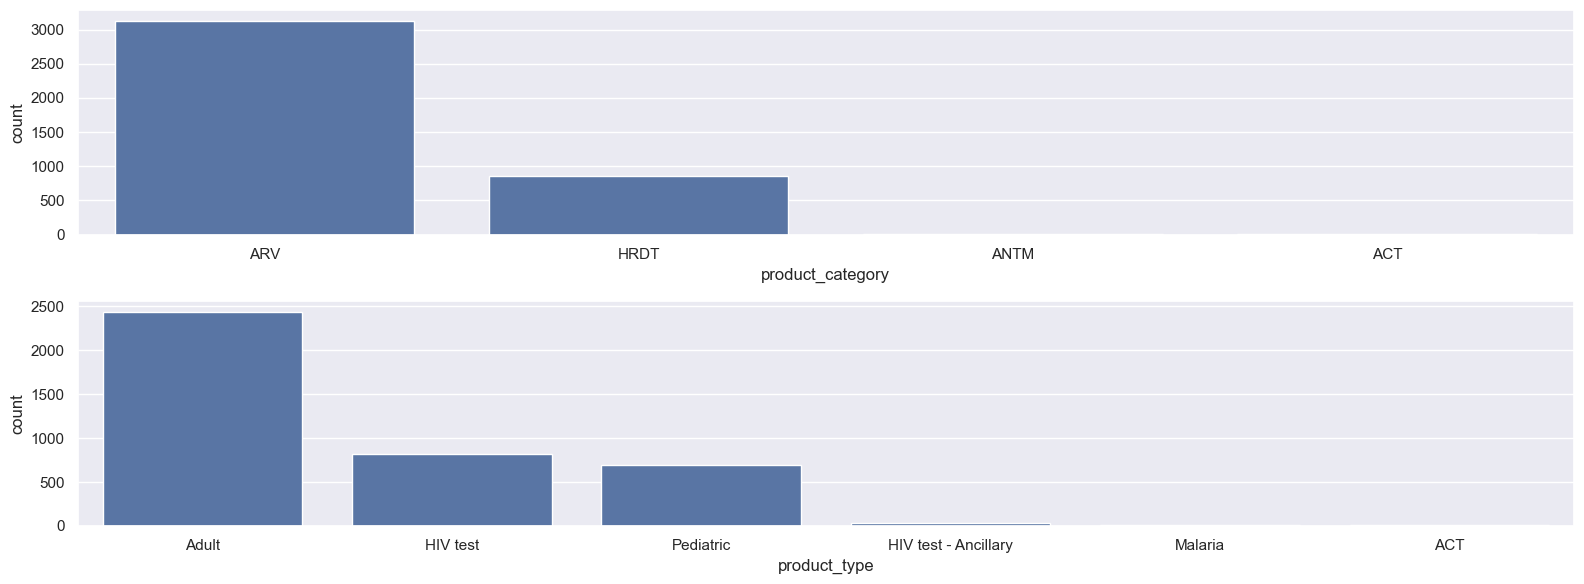

In [56]:
# Create subplots for Product type and category
fig, ax = plt.subplots(nrows=2)

# Iterate through selected columns and create a count plot for each
sns.countplot(data=data[product_feat], x='product_category', color=sns.color_palette()[0], order=data['product_category'].value_counts().index, ax=ax[0])
sns.countplot(data=data[product_feat], x='product_type', color=sns.color_palette()[0],  order=data['product_type'].value_counts().index, ax=ax[1])

plt.tight_layout();

In [57]:
round(data['product_type'].value_counts(normalize=True) * 100, 2)

Adult                   60.77
HIV test                20.52
Pediatric               17.40
HIV test - Ancillary     0.92
Malaria                  0.22
ACT                      0.15
Name: product_type, dtype: float64

In [58]:
round(data['product_category'].value_counts(normalize=True) * 100, 2)

ARV     78.18
HRDT    21.45
ANTM     0.22
ACT      0.15
Name: product_category, dtype: float64

In [59]:
# from wordcloud import WordCloud

# # Create a word cloud from the product_brand column
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data['product_brand'].value_counts())

# # Create a plot to display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Product Brand Word Cloud');

# from wordcloud import WordCloud

# # Combine text from selected columns into a single text string
# text = ' '.join(data['supplier']) + ' ' + ' '.join(data['product_brand']) + ' ' + ' '.join(data['dosage_form']) + ' ' + ' '.join(data['dosage'])

# # Create a word cloud from the combined text
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# # Create a plot to display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Multiple Columns')

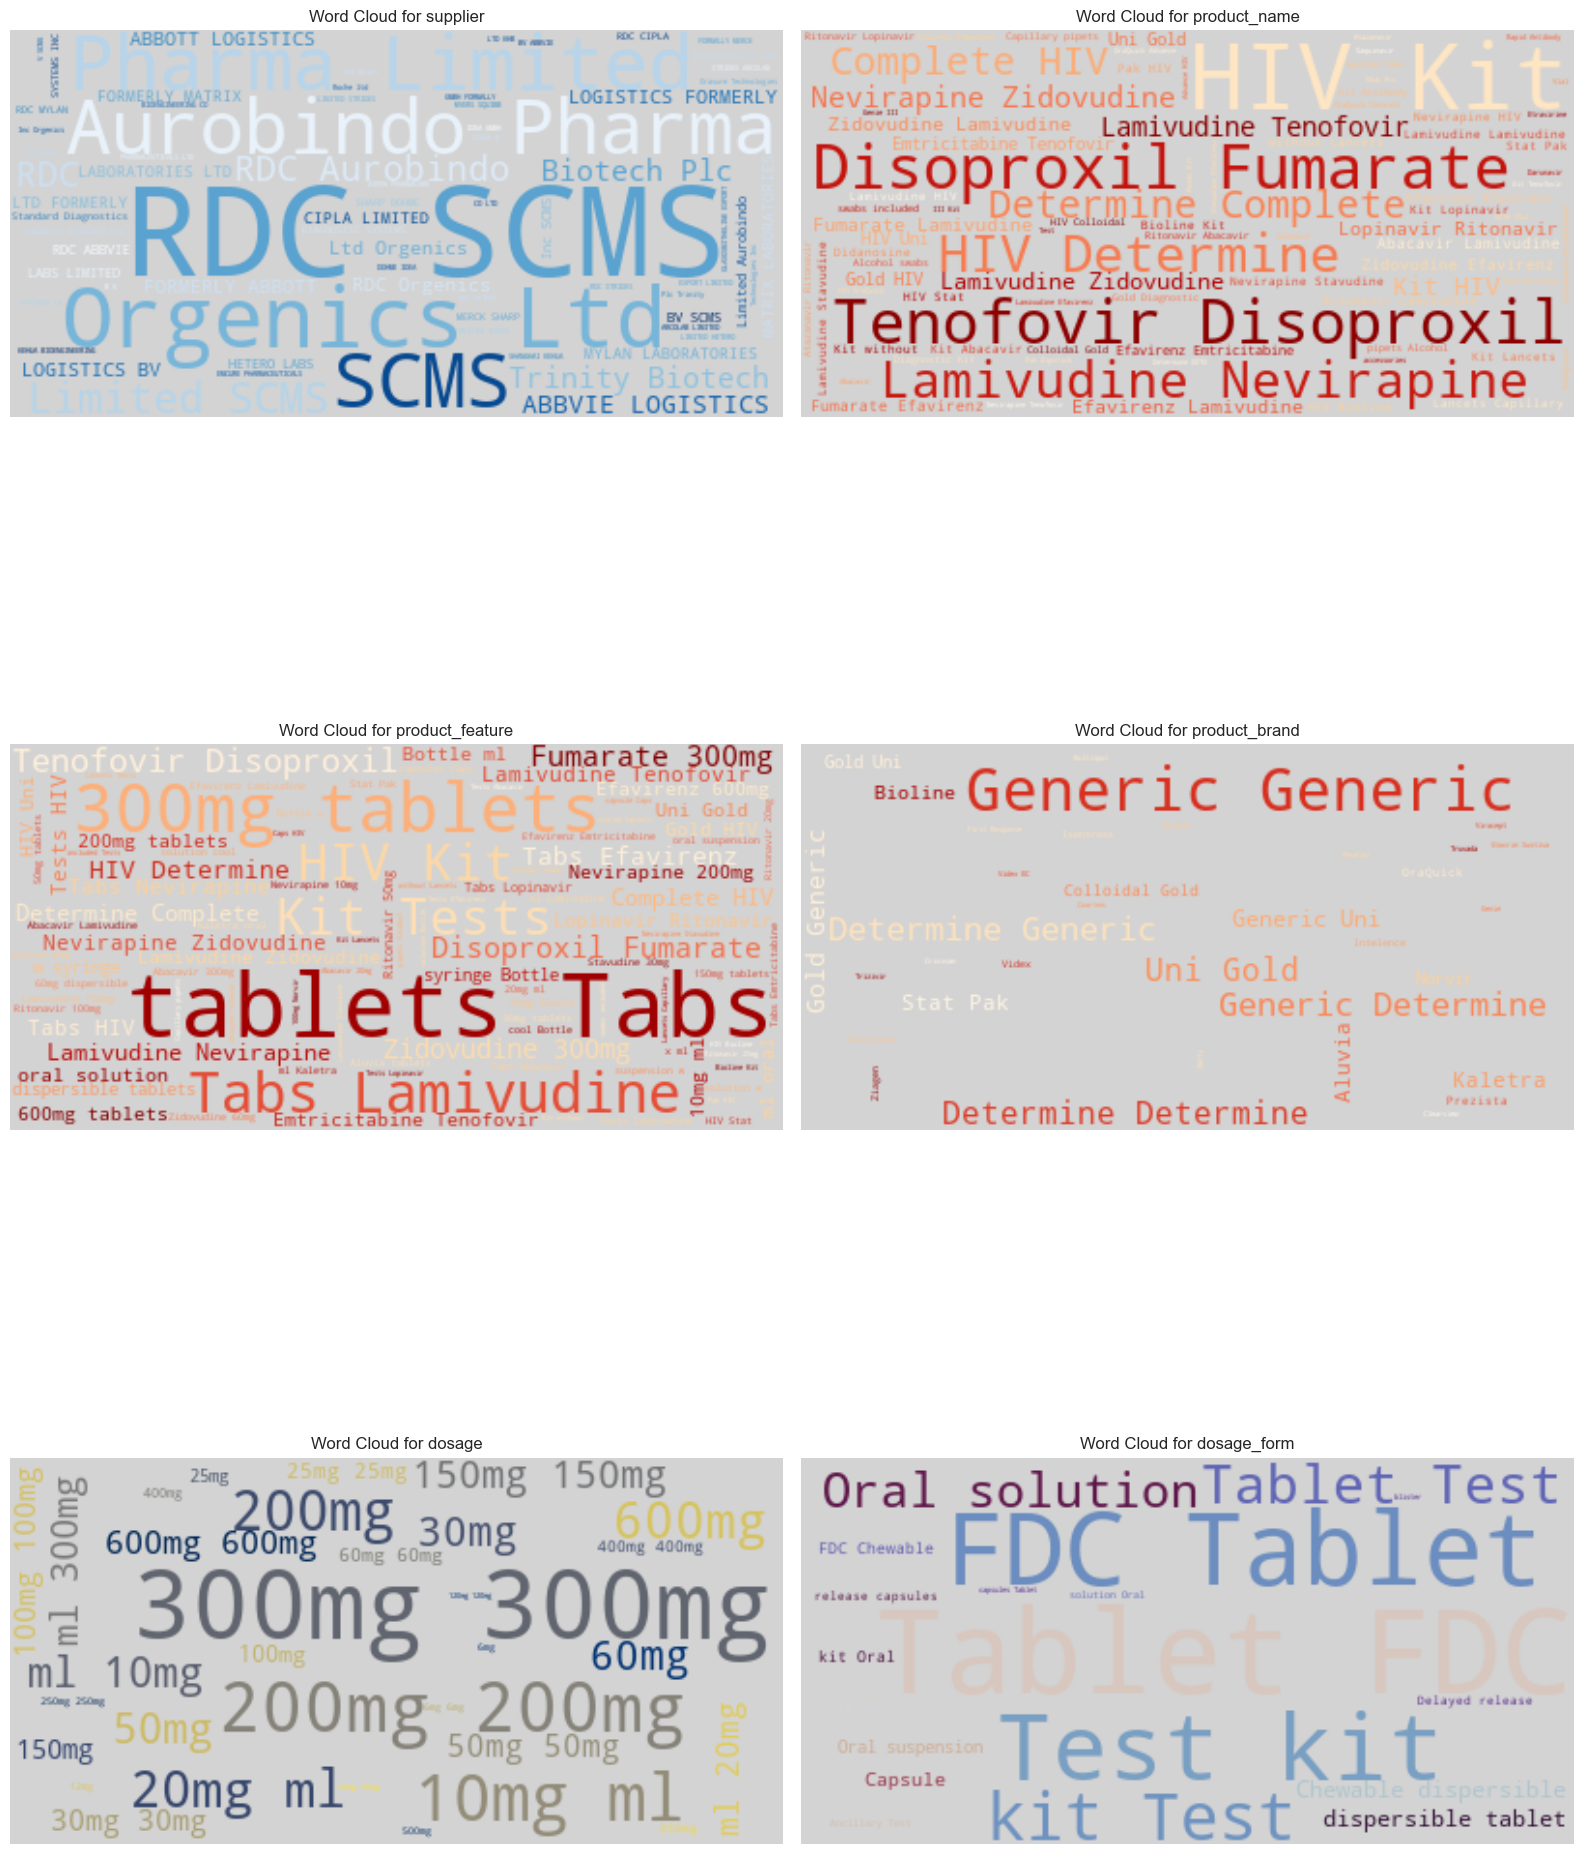

In [60]:
from wordcloud import WordCloud
import random

colors = ['OrRd', 'cividis', 'coolwarm', 'Blues', 'twilight', 'cool']
columns = ['supplier', 'product_name','product_feature', 'product_brand', 'dosage', 'dosage_form']

# Create a subplot grid based on the number of columns
num_columns = len(columns)
num_rows = (num_columns // 2) + (num_columns % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(16, num_rows * 8))

# Iterate through the columns and create word clouds
for i, col in enumerate(columns):
    # Combine text from the current column into a single text string
    text = ' '.join(data[col].dropna().astype(str))  # Drop NaN values and convert to string

    # Create a word cloud from the combined text
    wordcloud = WordCloud(width=400, height=200, background_color='lightgray', colormap=random.choice(colors)).generate(text)

    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a plot for the word cloud
    ax = axes[rows, cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {col}')

# Adjust layout and display the word clouds
plt.tight_layout()
plt.savefig("WordCloud_Chart.png", dpi=150)

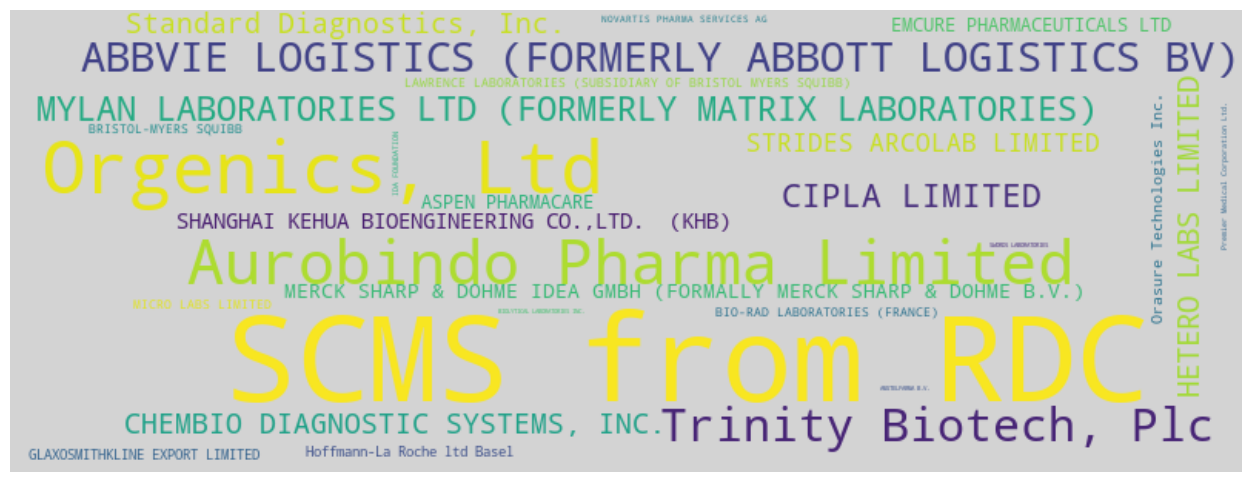

In [61]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=800, height=300,  background_color='lightgray').generate_from_frequencies(data['supplier'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("Suppliers_Name_Chart.png", dpi=150)

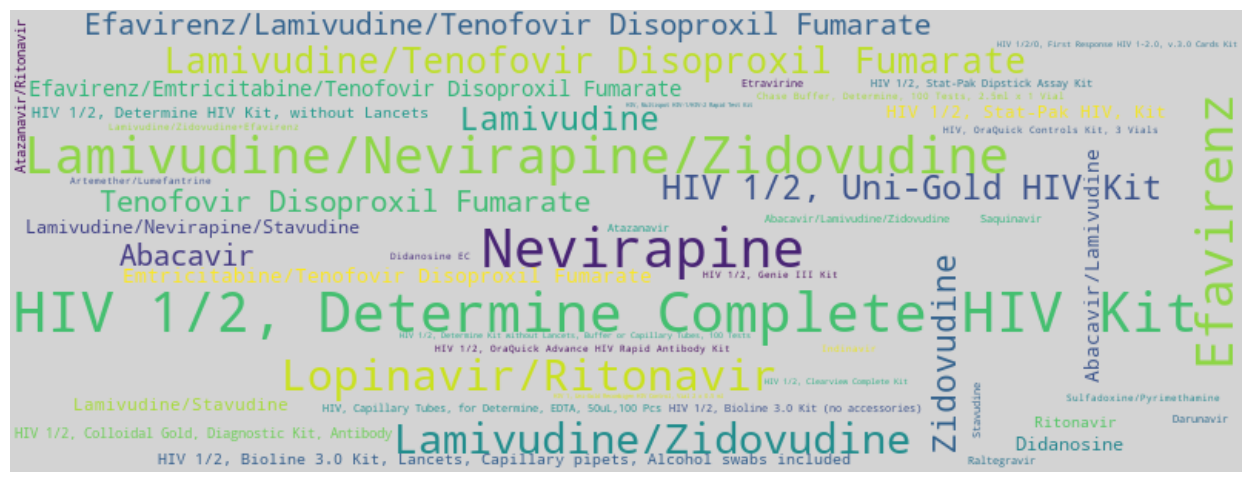

In [62]:
# Create a word cloud from the product_brand column
wordcloud = WordCloud(width=800, height=300,  background_color='lightgray').generate_from_frequencies(data['product_name'].value_counts())

# Create a plot to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

plt.savefig("Product_Name_Chart.png", dpi=150)

#### Logistics Features

In [63]:
columns_2 = data[logistics_feat].columns

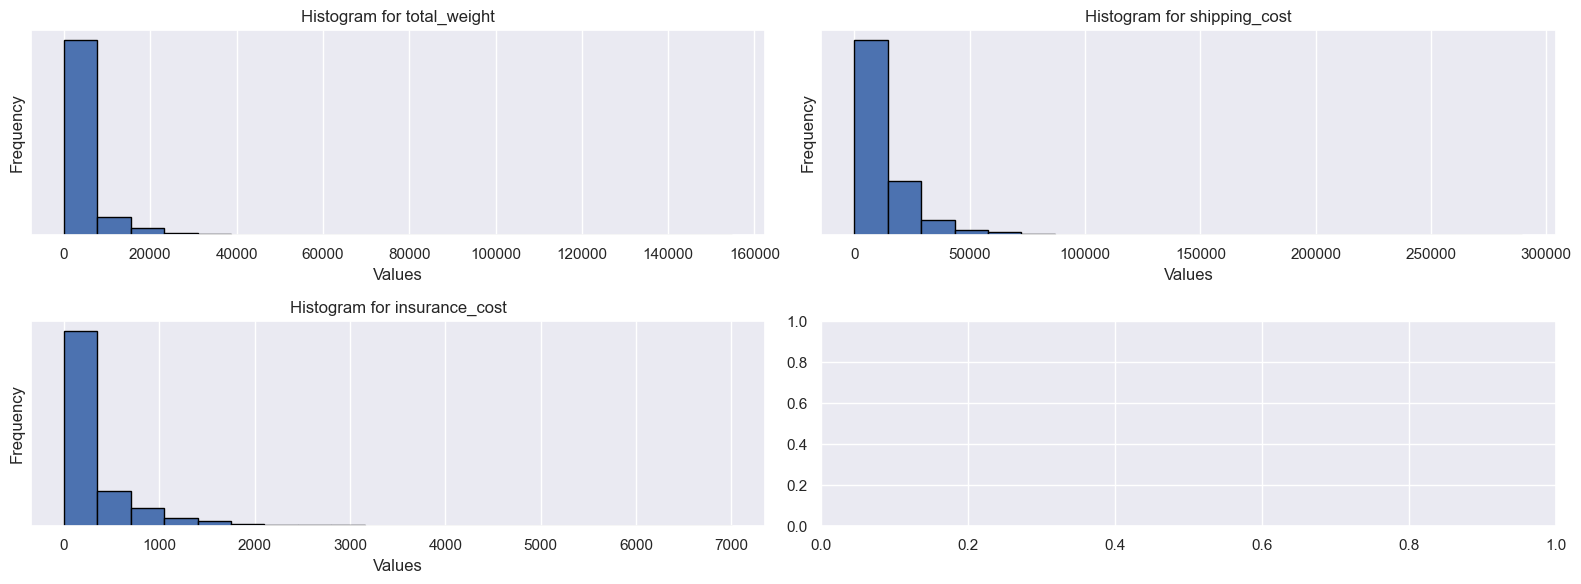

In [64]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and plot histograms
for i, col in enumerate(columns_2):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(data[col], bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Remove y-axis ticks
    ax.set_yticks([])

# Adjust layout and display the histograms
plt.tight_layout()

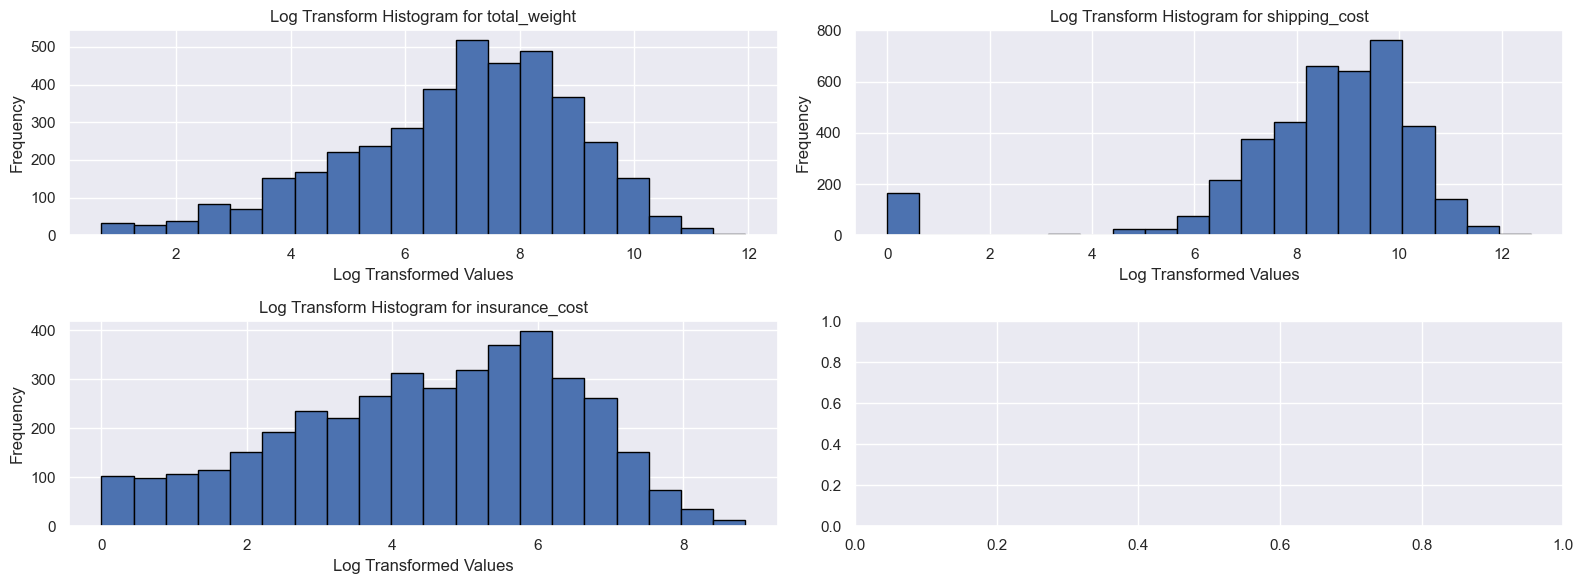

In [65]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and perform log transformation and plot histograms
for i, col in enumerate(columns_2):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Perform log transformation on the column
    transformed_data = np.log1p(data[col])  # Use np.log1p to handle zeros and negative values

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(transformed_data, bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Log Transform Histogram for {col}')
    ax.set_xlabel('Log Transformed Values')
    ax.set_ylabel('Frequency')

# Adjust layout and display the histograms
plt.tight_layout();

#### Quantity & Value Features

In [66]:
columns_3 = data[qty_value_feat].columns

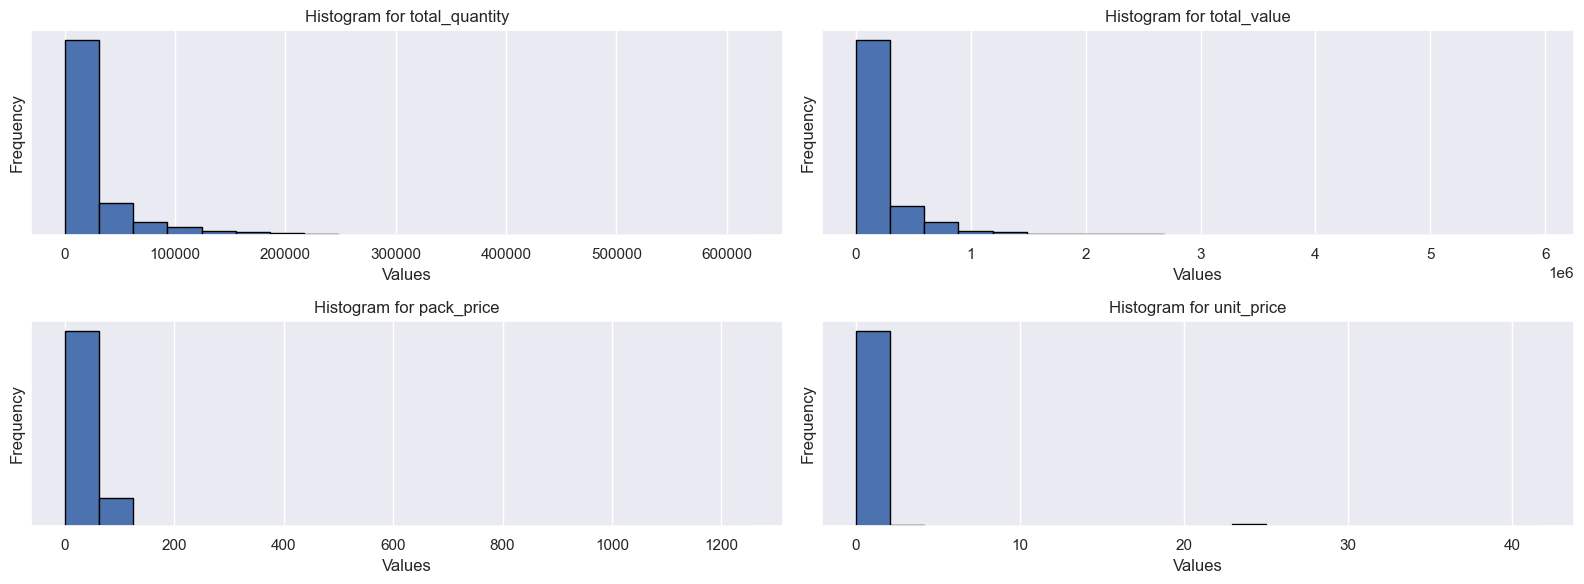

In [67]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and plot histograms
for i, col in enumerate(columns_3):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(data[col], bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Remove y-axis ticks
    ax.set_yticks([])

# Adjust layout and display the histograms
plt.tight_layout()

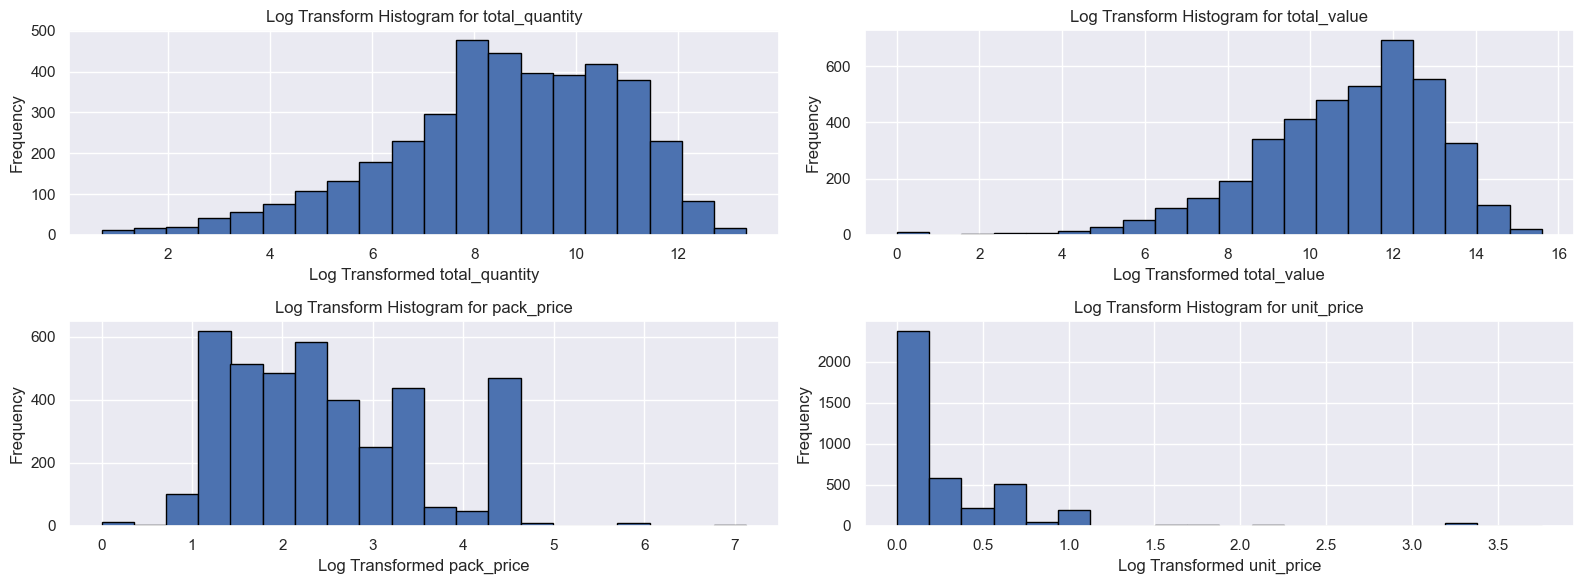

In [68]:
# Create subplots for each column
fig, axes = plt.subplots(2, 2)

# Iterate through the columns and perform log transformation and plot histograms
for i, col in enumerate(columns_3):
    # Determine the subplot location
    rows = i // 2
    cols = i % 2

    # Perform log transformation on the column
    transformed_data = np.log1p(data[col])  # Use np.log1p to handle zeros and negative values

    # Create a histogram
    ax = axes[rows, cols]
    ax.hist(transformed_data, bins=20, color=sns.color_palette()[0], edgecolor='black')
    ax.set_title(f'Log Transform Histogram for {col}')
    ax.set_xlabel(f'Log Transformed {col}')
    ax.set_ylabel('Frequency')

# Adjust layout and display the histograms
plt.tight_layout();

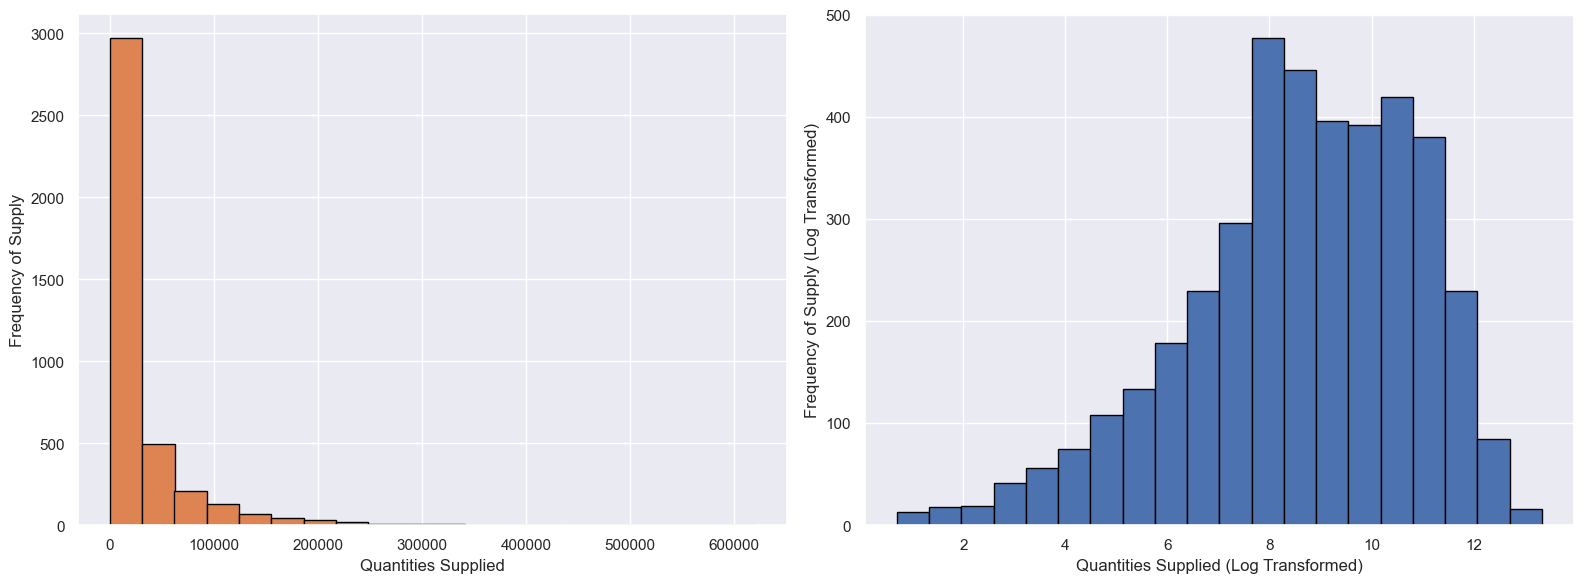

In [69]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram without log transformation
axes[0].hist(data["total_quantity"], bins=20, color=sns.color_palette()[1], edgecolor='black')
# axes[0].set_title('Original Quantities')
axes[0].set_xlabel('Quantities Supplied')
axes[0].set_ylabel('Frequency of Supply')

# Histogram with log transformation
transformed_qty = np.log1p(data["total_quantity"]) 
axes[1].hist(transformed_qty, bins=20, color=sns.color_palette()[0], edgecolor='black')
# axes[1].set_title('Log Transformed Quantities')
axes[1].set_xlabel('Quantities Supplied (Log Transformed)')
axes[1].set_ylabel('Frequency of Supply (Log Transformed)')



# Adjust layout and display the histograms
plt.tight_layout()
plt.savefig("Log_Transform_vs_Original_Quantities.png", dpi=150)

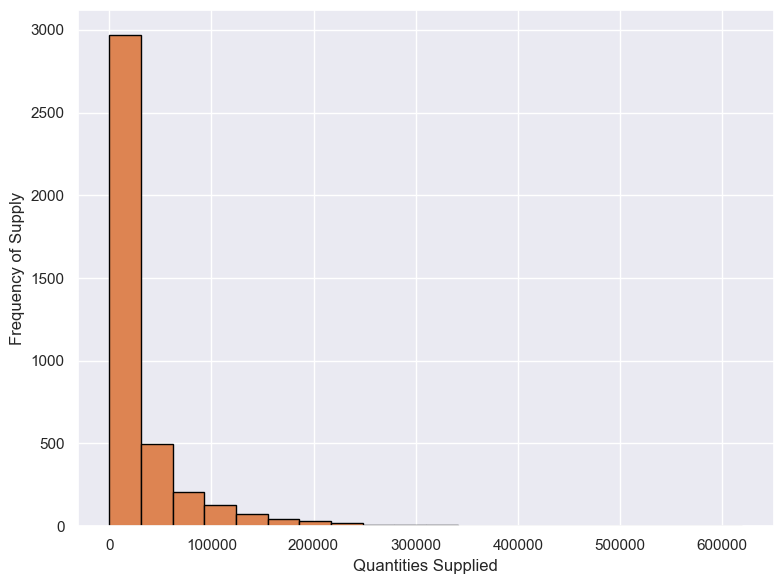

In [70]:
# Original Quantities Histogram
plt.figure(figsize=(8, 6))
plt.hist(data["total_quantity"], bins=20, color=sns.color_palette()[1], edgecolor='black')
plt.xlabel('Quantities Supplied')
plt.ylabel('Frequency of Supply')
plt.tight_layout();
plt.savefig("Original_Quantities.png", dpi=150)

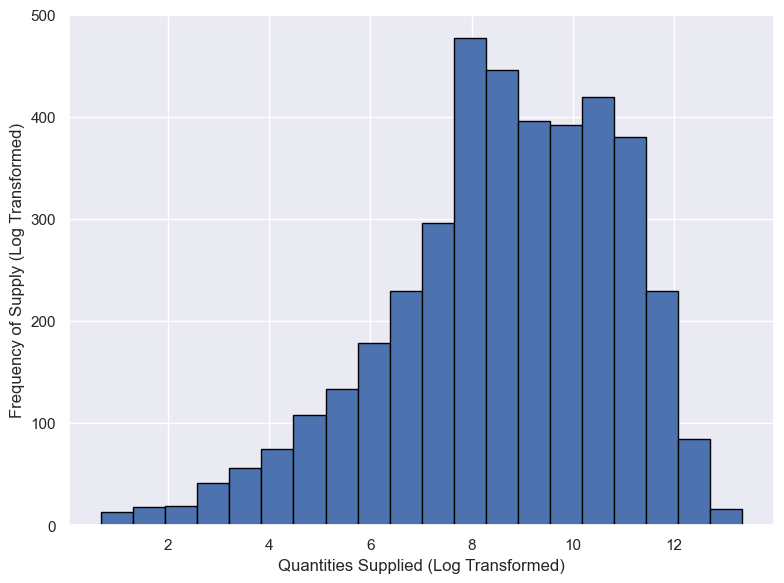

In [71]:
# Log Transformed Quantities Histogram
transformed_qty = np.log1p(data["total_quantity"])

plt.figure(figsize=(8, 6))
plt.hist(transformed_qty, bins=20, color=sns.color_palette()[0], edgecolor='black')
plt.xlabel('Quantities Supplied (Log Transformed)')
plt.ylabel('Frequency of Supply (Log Transformed)')
plt.tight_layout();
plt.savefig("Log_Transformed_Quantities.png", dpi=150)

#### Shipment Features

In [72]:
data[shipment_feat].nunique()

manager            1
delivery_method    2
vendor_terms       8
transport_mode     4
dtype: int64

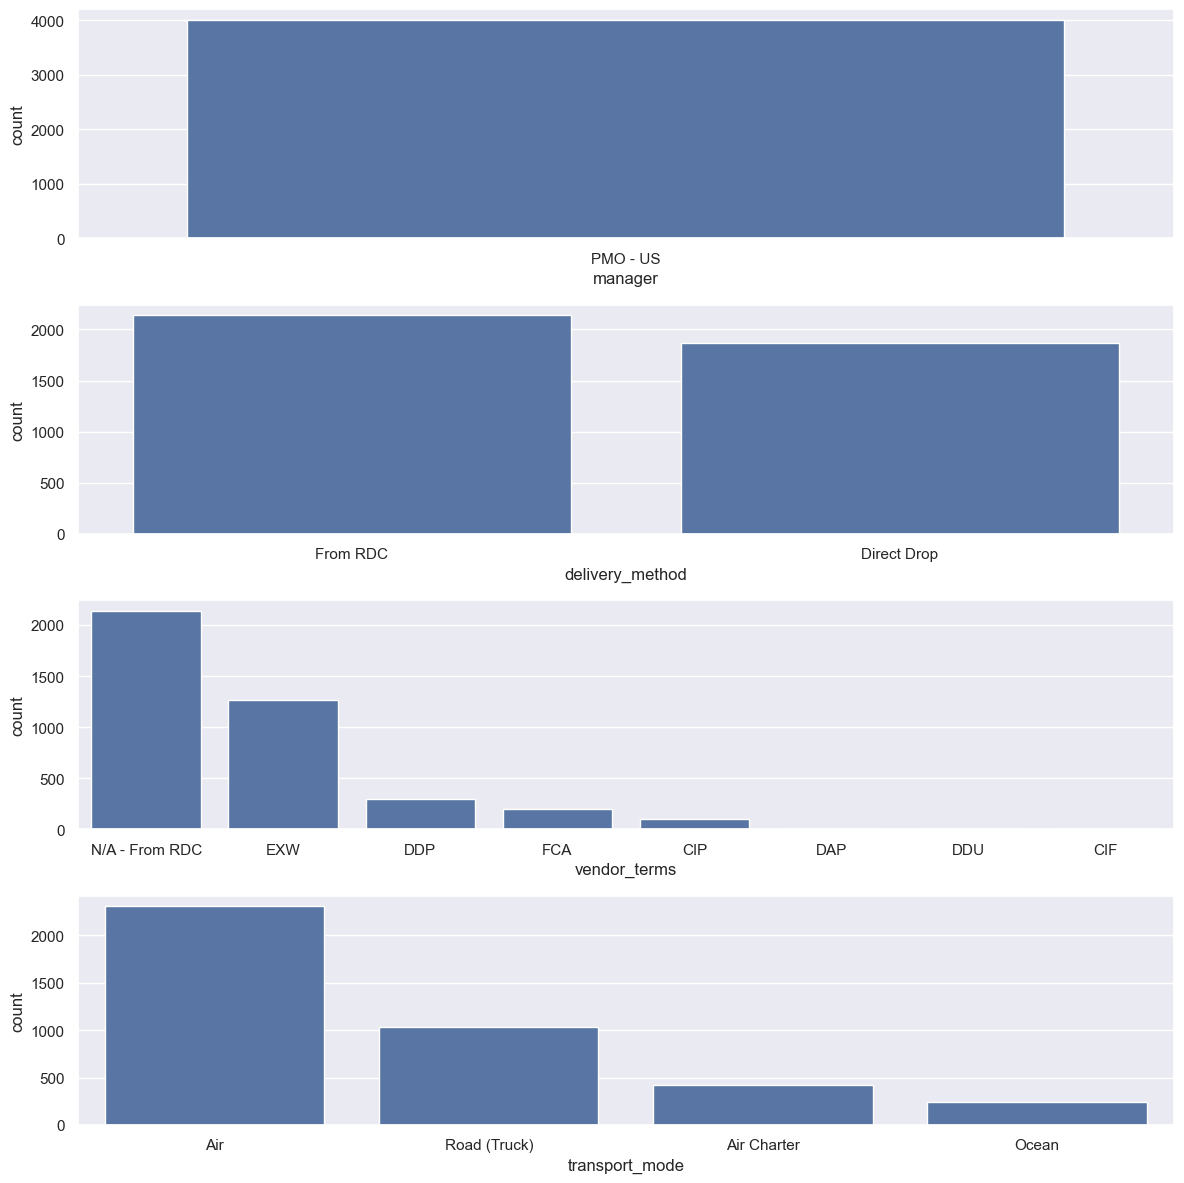

In [73]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=4, figsize=(12, 12))

# Iterate through selected columns and create a count plot for each
sns.countplot(data=data[shipment_feat], x='manager', color=sns.color_palette()[0], order=data['manager'].value_counts().index,ax=ax[0])
sns.countplot(data=data[shipment_feat], x='delivery_method', color=sns.color_palette()[0], order=data['delivery_method'].value_counts().index, ax=ax[1])
sns.countplot(data=data[shipment_feat], x='vendor_terms', color=sns.color_palette()[0], order=data['vendor_terms'].value_counts().index,ax=ax[2])
sns.countplot(data=data[shipment_feat], x='transport_mode', color=sns.color_palette()[0],order=data['transport_mode'].value_counts().index, ax=ax[3])

plt.tight_layout();

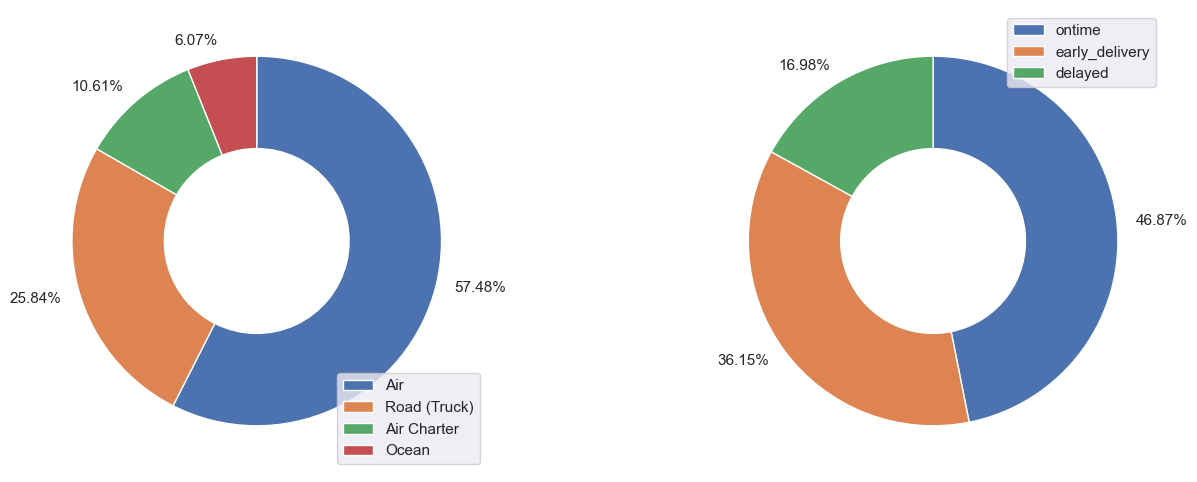

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
# Plot of Shipement Mode distribution
shipmentcount = round(data["transport_mode"].value_counts(normalize=True)*100,2)
plt.pie(shipmentcount, labels=[f"{str(x)}%" for x in shipmentcount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
# plt.title('Shipment Mode Distribution', fontsize=14)
plt.legend(shipmentcount.index);

plt.subplot(1, 2, 2)
# Plot of Shipement Mode distribution
statuscount = round(data["delivery_status"].value_counts(normalize=True)*100,2)
plt.pie(statuscount, labels=[f"{str(x)}%" for x in statuscount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
# plt.title('Delivery Status Distribution', fontsize=14)
plt.legend(statuscount.index);
plt.savefig("Shipment_Mode_&_Delivery_Status_Chart.png", dpi=150)

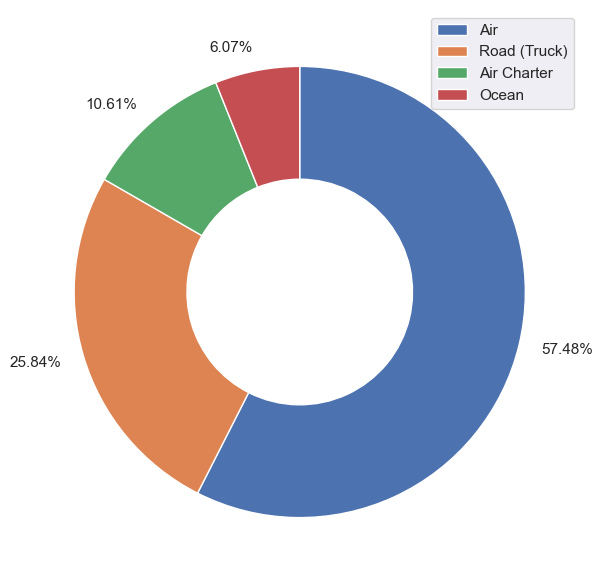

In [75]:
# Plot of Shipment Mode Distribution
plt.figure(figsize=(8, 6))
shipmentcount = round(data["transport_mode"].value_counts(normalize=True) * 100, 2)
plt.pie(shipmentcount, labels=[f"{str(x)}%" for x in shipmentcount.values], startangle=90, counterclock=False, wedgeprops={'width': 0.5})
plt.legend(shipmentcount.index)
plt.tight_layout();
plt.savefig("Shipment_Mode_Distribution.png", dpi=150)

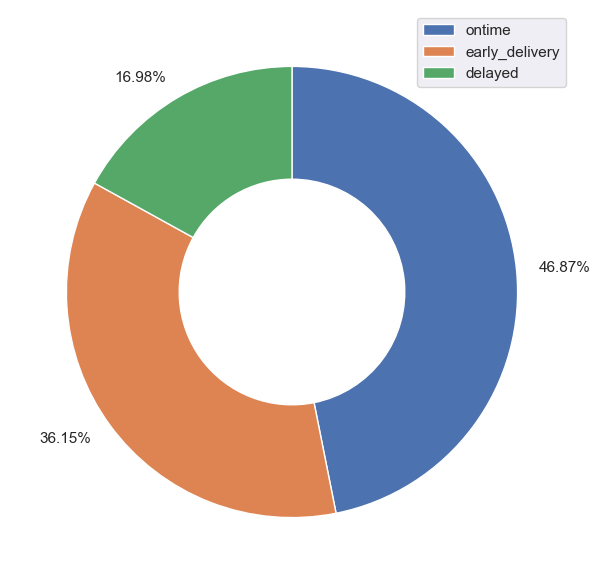

In [76]:
# Plot of Delivery Status Distribution
plt.figure(figsize=(8, 6))
statuscount = round(data["delivery_status"].value_counts(normalize=True) * 100, 2)
plt.pie(statuscount, labels=[f"{str(x)}%" for x in statuscount.values], startangle=90, counterclock=False, wedgeprops={'width': 0.5})
plt.legend(statuscount.index)
plt.tight_layout();
plt.savefig("Delivery_Status_Distribution.png", dpi=150)

## Bivariate Analysis

#### Delivery Method vs. Total Quantity

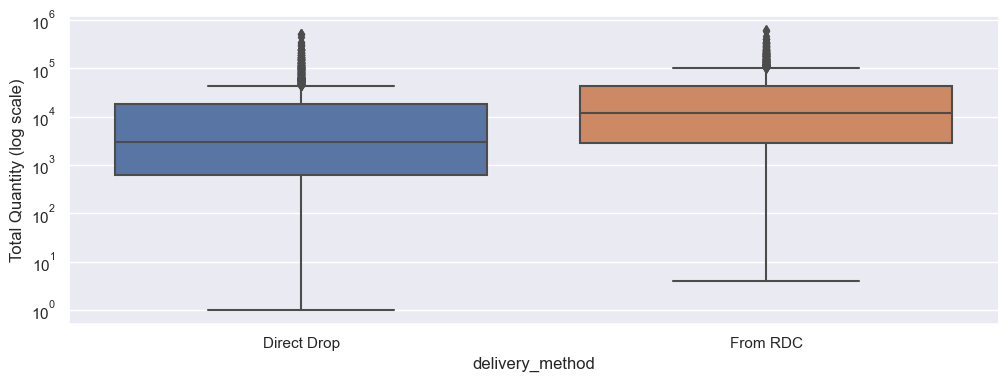

In [77]:
fig, axes = plt.subplots(figsize=(12, 4))

# Delivery Method vs. Total Quantity
sns.boxplot(x='delivery_method', y='total_quantity', data=data)
# plt.title('Delivery Method vs. Total Quantity')

# Set the y-axis to a logarithmic scale
axes.set_yscale('log')

# Set a label for the y-axis to indicate the scale
axes.set_ylabel('Total Quantity (log scale)');
plt.savefig("Delivery_Method_versus_Total_Quantity.png", dpi=150)

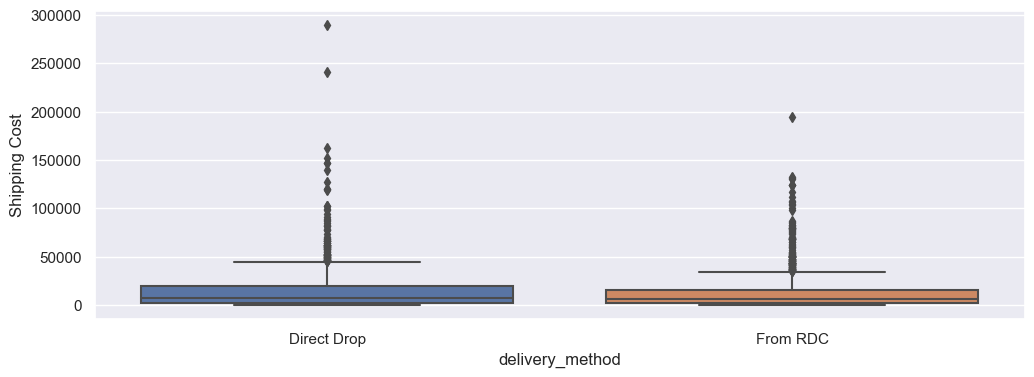

In [78]:
fig, axes = plt.subplots(figsize=(12, 4))

# Delivery Method vs. Total Quantity
sns.boxplot(x='delivery_method', y='shipping_cost', data=data)
# plt.title('Delivery Method vs. Total Quantity')

# Set the y-axis to a logarithmic scale
# axes.set_yscale('log')

# Set a label for the y-axis to indicate the scale
axes.set_ylabel('Shipping Cost');
plt.savefig("Delivery_Method_versus_Shipping_Cost.png", dpi=150)

This reveals disparities in the quantity of orders handled using the differnt delivery method

#### Delivery Method versus Total value & Total quantity

We can see that the method of delivery affects both quantity and the value significantly

#### Product Category wrt Total value , Total quantity, Unit Cost & and Insurance Cost

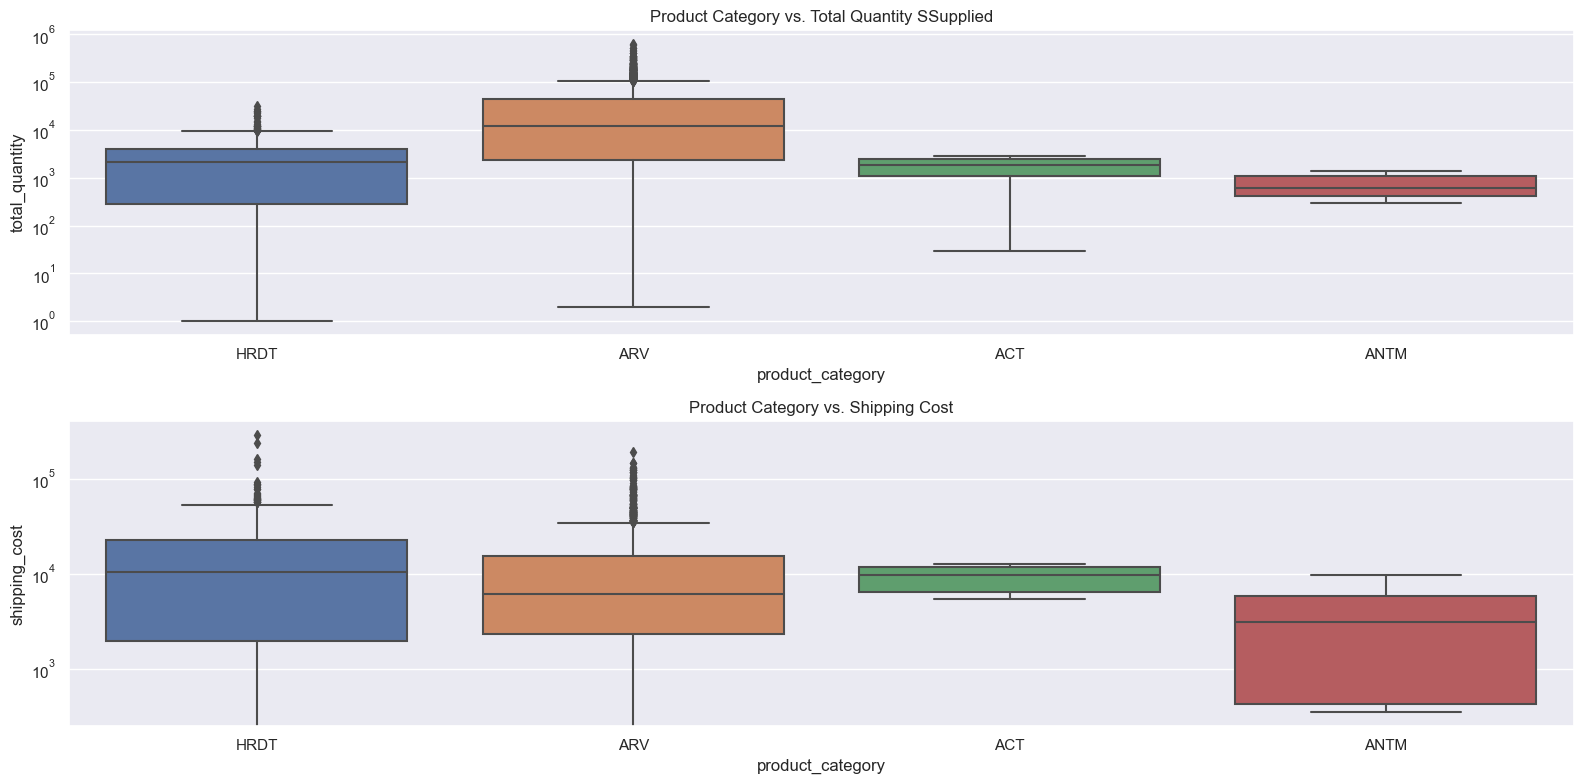

In [79]:
# Create a 2x1 subplot figure with a specific figure size
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Subplot 1: Product Category vs. Total Quantity
sns.boxplot(x='product_category', y='total_quantity', data=data, ax=axes[0])
axes[0].set_title('Product Category vs. Total Quantity SSupplied')
axes[0].set_yscale('log')  # Set the y-axis to a logarithmic scale

# Subplot 2: Product Category vs. Unit Price
sns.boxplot(x='product_category', y='shipping_cost', data=data, ax=axes[1])
axes[1].set_title('Product Category vs. Shipping Cost')
axes[1].set_yscale('log')  # Set the y-axis to a logarithmic scale

plt.tight_layout()
plt.savefig("Product_Category_versus_Total_Quantity_&_Shipping_Cost.png", dpi=150)

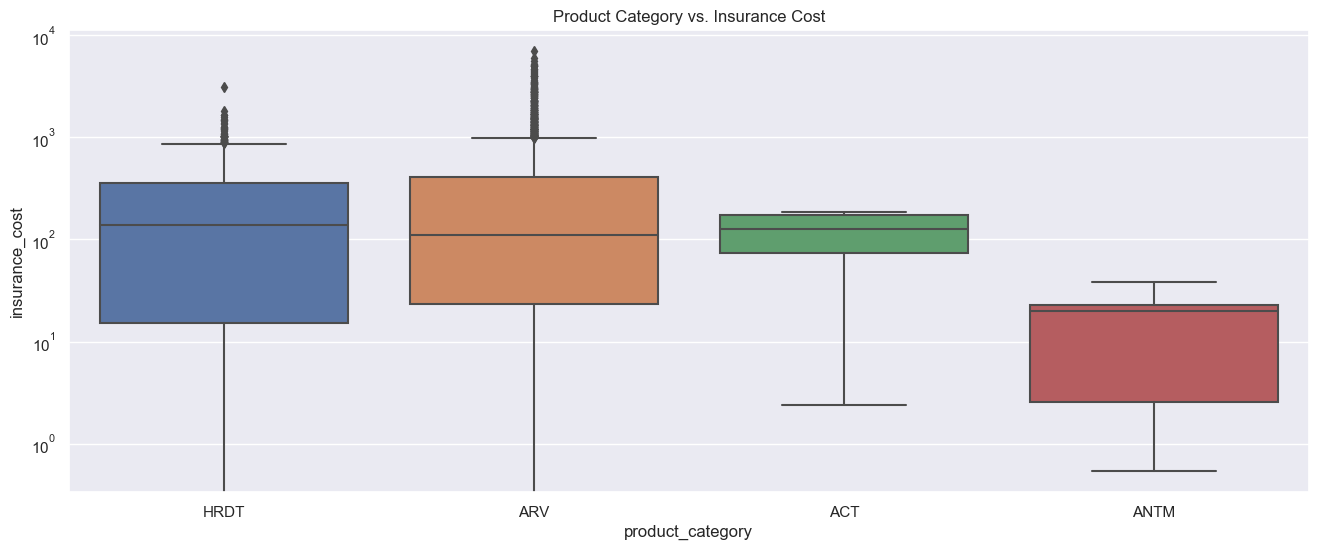

In [80]:
sns.boxplot(x='product_category', y='insurance_cost', data=data)
plt.title('Product Category vs. Insurance Cost')
plt.yscale('log')  # Set the y-axis to a logarithmic scale

While ARV product records high quantity and high purchase, it seems to be a relatively cheap considering the unit price

#### Product Type vs. Total value , Total quantity, Unit Cost & and Insurance Cost

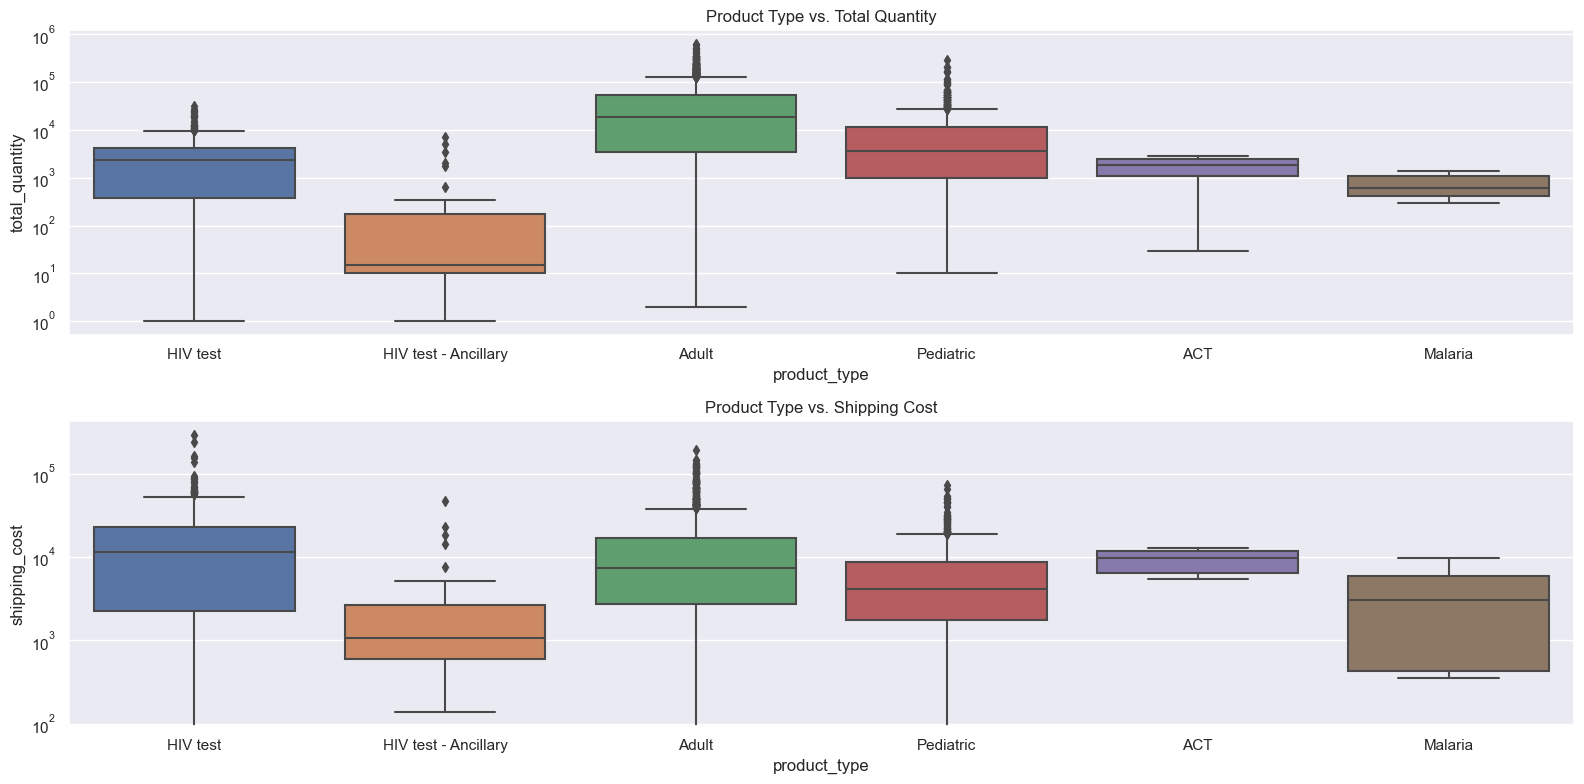

In [81]:
# Create a 2x1 subplot figure with a specific figure size
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Subplot 1: Product Type vs. Total Quantity
sns.boxplot(x='product_type', y='total_quantity', data=data, ax=axes[0])
axes[0].set_title('Product Type vs. Total Quantity')
axes[0].set_yscale('log')  # Set the y-axis to a logarithmic scale

# Subplot 2: Product Type vs. Unit Price
sns.boxplot(x='product_type', y='shipping_cost', data=data, ax=axes[1])
axes[1].set_title('Product Type vs. Shipping Cost')
axes[1].set_yscale('log')  # Set the y-axis to a logarithmic scale

plt.tight_layout();
# plt.savefig("Product_Type_versus_Total_Quantity_&_Unit_Price.png", dpi=150)

Similar observation can be made concerning this too

#### Transport Mode vs. Cost per Unit Weight and  Total quantity

In [82]:
data["shipping_cost_per_weight"] = data["shipping_cost"] / data["total_weight"]

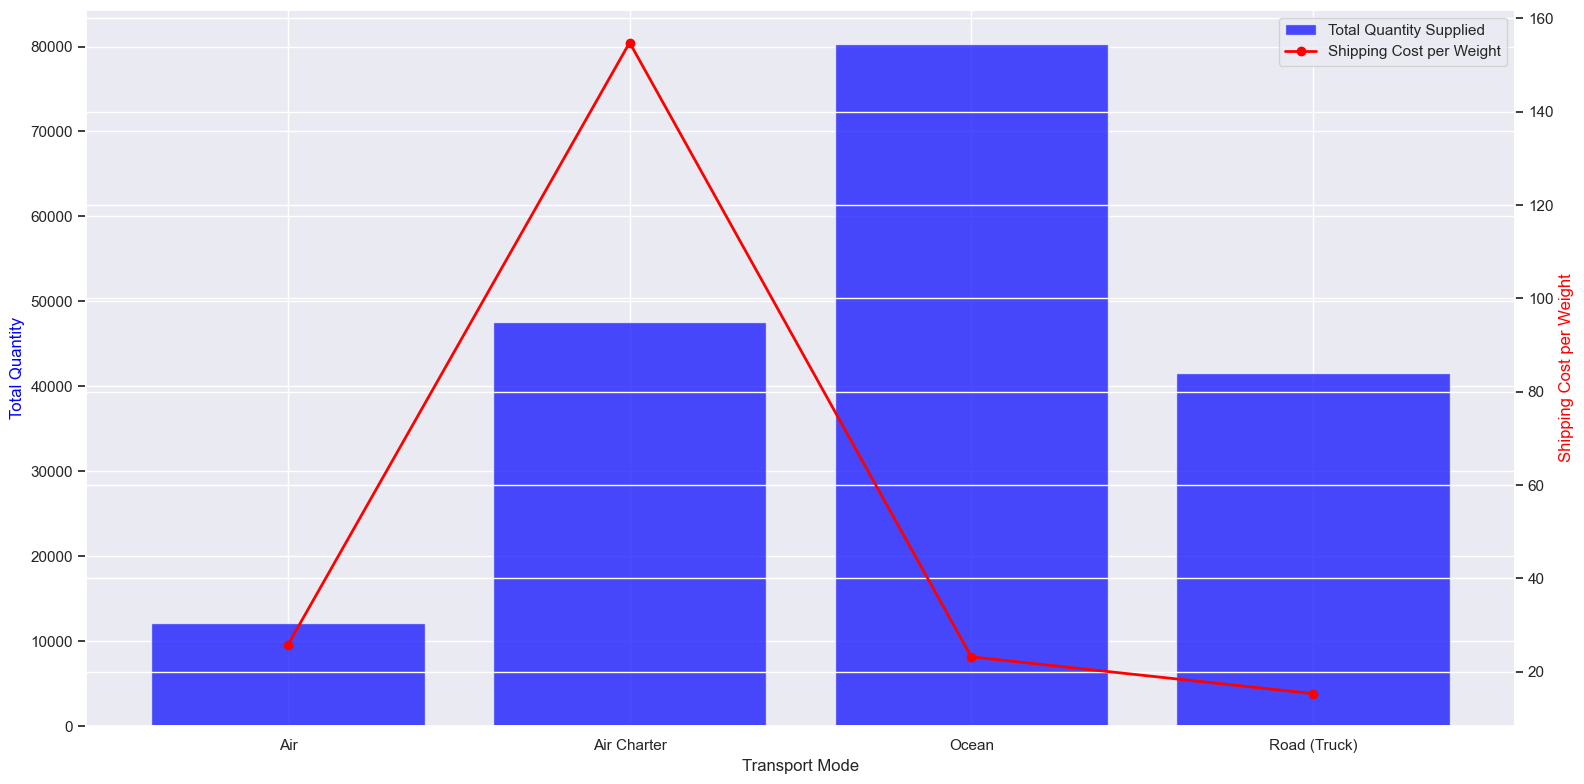

In [83]:
# Define the data
transport_quantity_data = data.groupby('transport_mode')['total_quantity'].mean()
transport_cost_weight = data.groupby('transport_mode')['shipping_cost_per_weight'].mean()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(16, 8))

# Set the x-axis labels
index = range(len(transport_quantity_data))

# Plot Total Quantity as bars
ax1.bar(index, transport_quantity_data, color='blue', alpha=0.7, label='Total Quantity Supplied')

# Set the y-axis label for Total Quantity
ax1.set_ylabel('Total Quantity', color='blue')

# Create a secondary y-axis for Cost per Weight
ax2 = ax1.twinx()
ax2.plot(index, transport_cost_weight, color='red', marker='o', linestyle='-', linewidth=2, label='Shipping Cost per Weight')

# Set the y-axis label for Cost per Weight
ax2.set_ylabel('Shipping Cost per Weight', color='red')

# Set the x-axis labels and title
ax1.set_xticks(index)
ax1.set_xticklabels(transport_quantity_data.index, rotation=0)
ax1.set_xlabel('Transport Mode')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Show plot
# plt.title('Total Quantity and Shipping Cost per Weight by Transport Mode')
plt.tight_layout()
plt.savefig("Total_Quantity_and_Shipping_Cost_per_Weight_by_Transport_Mode.png", dpi=150)

In [84]:
data.groupby(data['transport_mode'])[['shipping_cost_per_weight', 'total_quantity']].sum().sort_values(by='shipping_cost_per_weight')

shipping_cost_per_weight  total_quantity
transport_mode                                          
Ocean                        5638.439761        19509276
Road (Truck)                15866.292213        43066033
Air                         59326.281096        27851555
Air Charter                 65799.355930        20200919

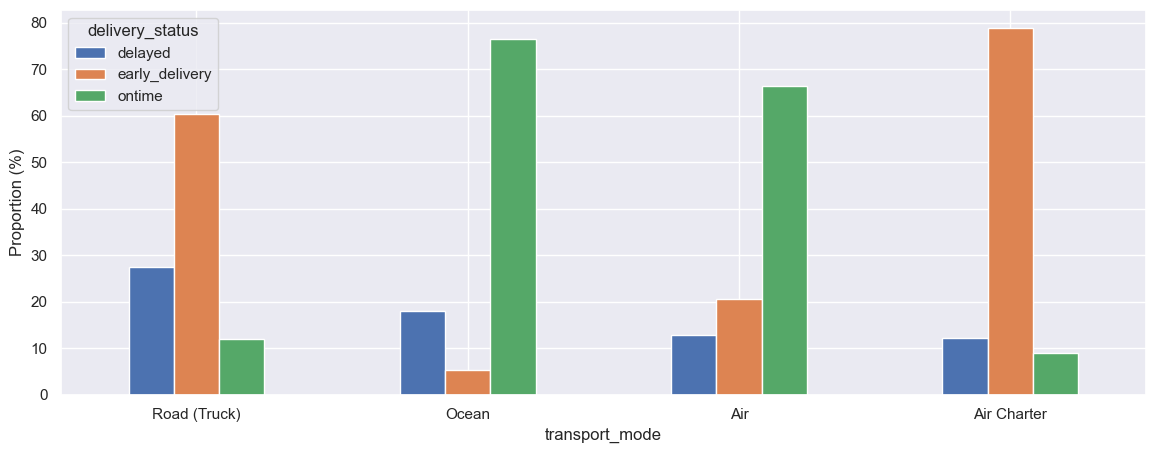

In [85]:
# Calculate proportions 
proportions = data.pivot_table(index='transport_mode', columns='delivery_status', aggfunc='size', fill_value=0)
proportions = proportions.divide(proportions.sum(axis=1), axis=0)
proportions_plot = proportions.mul(100).round(2)

# Sort the DataFrame based on 'delayed' column for the bar plot
proportions_plot_sorted = proportions_plot.sort_values(by='delayed', ascending=False)

# Create a bar plot for proportions
fig, ax = plt.subplots(figsize=(14, 5))
proportions_plot_sorted.plot(kind='bar', ax=ax)
ax.set_ylabel('Proportion (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
# ax.set_title('Proportion of Delivery Status by Transport Mode')
plt.savefig("Transport_Mode_Delivery_Status.png", dpi=150)

In [86]:
# Display the table sorted by 'delayed' column
proportions_plot_sorted = proportions_plot_sorted.astype(str) + '%'
proportions_plot_sorted.sort_values(by='delayed', ascending=False)

delivery_status delayed early_delivery  ontime
transport_mode                                
Road (Truck)     27.54%         60.48%  11.98%
Ocean            18.11%          5.35%  76.54%
Air              12.99%         20.59%  66.42%
Air Charter      12.24%         78.82%   8.94%

While Air transportation mode seems to be more robust (wide variation), Truck still carries more quantity of the commodities which also acount for the highest values of commodities transported, where Air shipping cost seems to be more expensive and carries more heavy weight commodities

#### Supplier vs. Total Quantity and Total Value

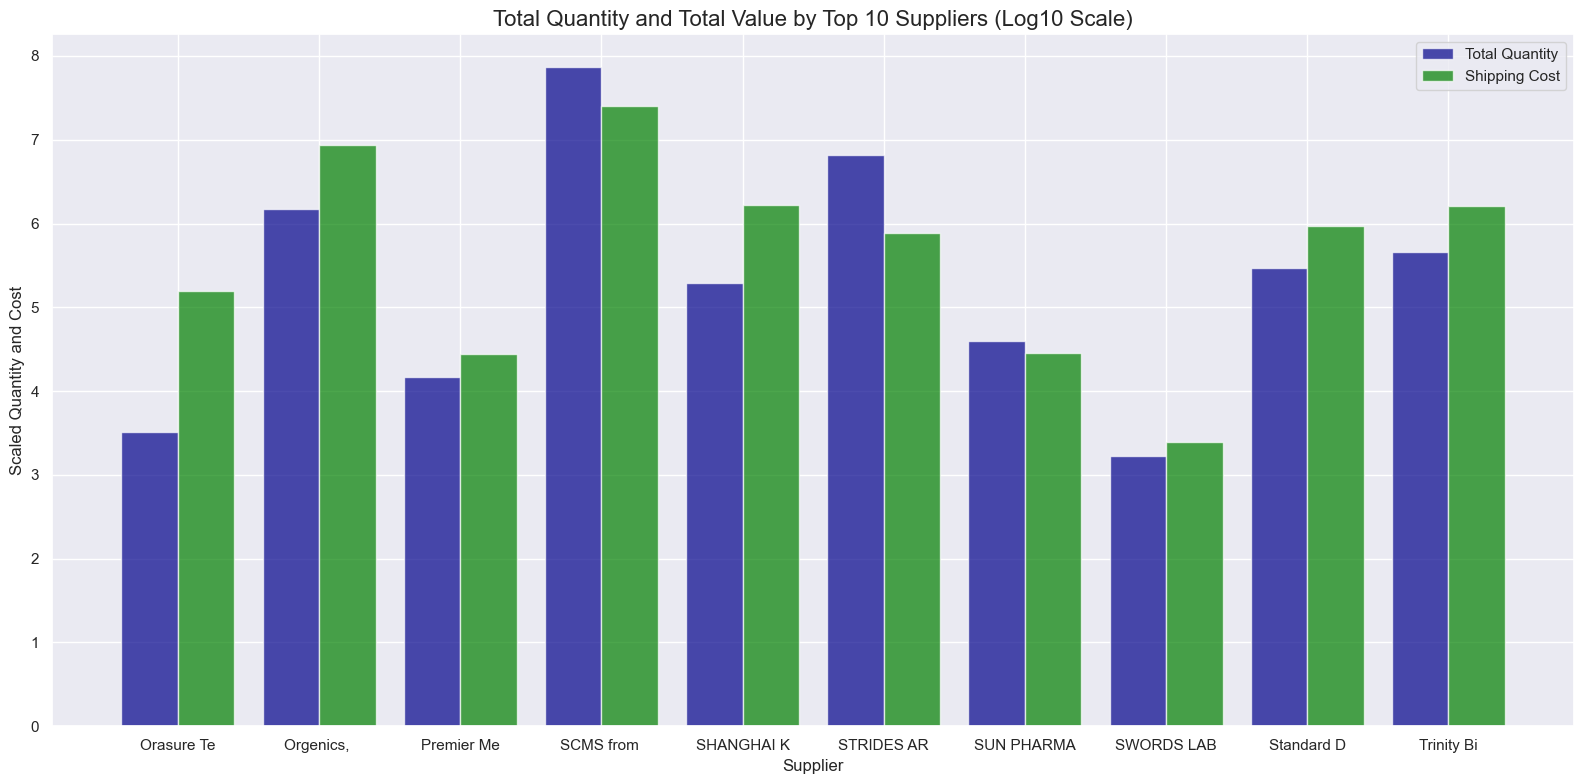

In [87]:
# Define the data
supplier_quantity_data = data.groupby('supplier')['total_quantity'].sum().tail(10)
supplier_quantity_data.index = supplier_quantity_data.index.str[:10]  # Slice the index to the first 5 characters
supplier_value_data = data.groupby('supplier')['shipping_cost'].sum().tail(10)
supplier_value_data.index = supplier_value_data.index.str[:10]  # Slice the index to the first 5 characters

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Set the bar width and positions
bar_width = 0.4
index = np.arange(len(supplier_quantity_data))

# Plot Total Quantity
ax.bar(index, np.log10(supplier_quantity_data), bar_width, label='Total Quantity', color='darkblue', alpha=0.7)

# Plot Total Value
ax.bar(index + bar_width, np.log10(supplier_value_data), bar_width, label='Shipping Cost', color='green', alpha=0.7)

# Set the x-axis labels and title
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(supplier_quantity_data.index, rotation=0)
ax.set_xlabel('Supplier')
ax.set_title('Total Quantity and Total Value by Top 10 Suppliers (Log10 Scale)', fontsize=16)

# Set the y-axis label
ax.set_ylabel('Scaled Quantity and Cost')

# Add a legend
ax.legend()

plt.tight_layout();
# plt.savefig("Total_Quantity_and_Shipping_Cost_by_Top_10_Suppliers.png", dpi=150)

#### Shipping Cost wrt Total value , Insurance Cost, Total Quantity, and Total Weight

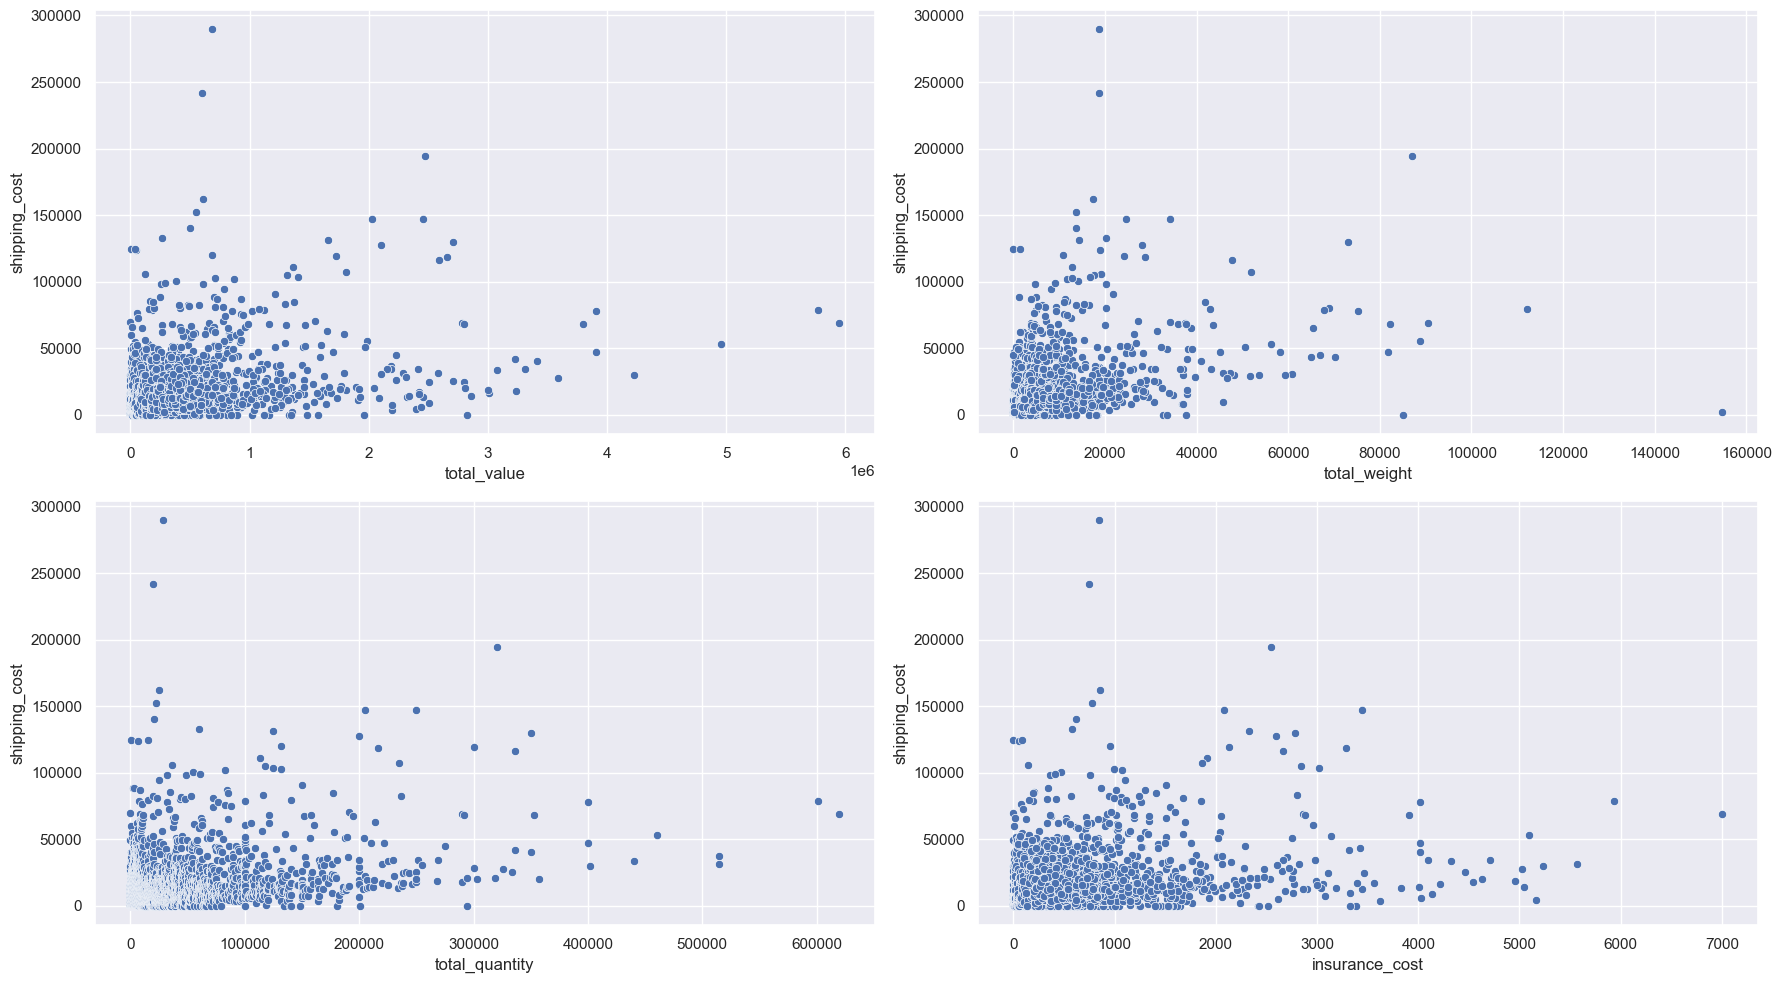

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Subplot 1: Total Quantity vs. Total Value 
plt.subplot(2, 2, 1)
sns.scatterplot(x='total_value', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Total Value')

# Subplot 2: Total Quantity vs. Total Weight 
plt.subplot(2, 2, 2)
sns.scatterplot(x='total_weight', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Total Weight')

# Subplot 3: Total Quantity vs. Shipping Cost
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_quantity', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Shipping Cost')

# Subplot 4: Total Quantity vs. Insurance Cost 
plt.subplot(2, 2, 4)
sns.scatterplot(x='insurance_cost', y='shipping_cost', data=data)
# plt.title('Total Quantity vs. Insurance Cost')

# Adjust spacing between subplots
plt.tight_layout();
plt.savefig("Shipping_versus_weight_value_insurance_&_total_quantity.png", dpi=150)

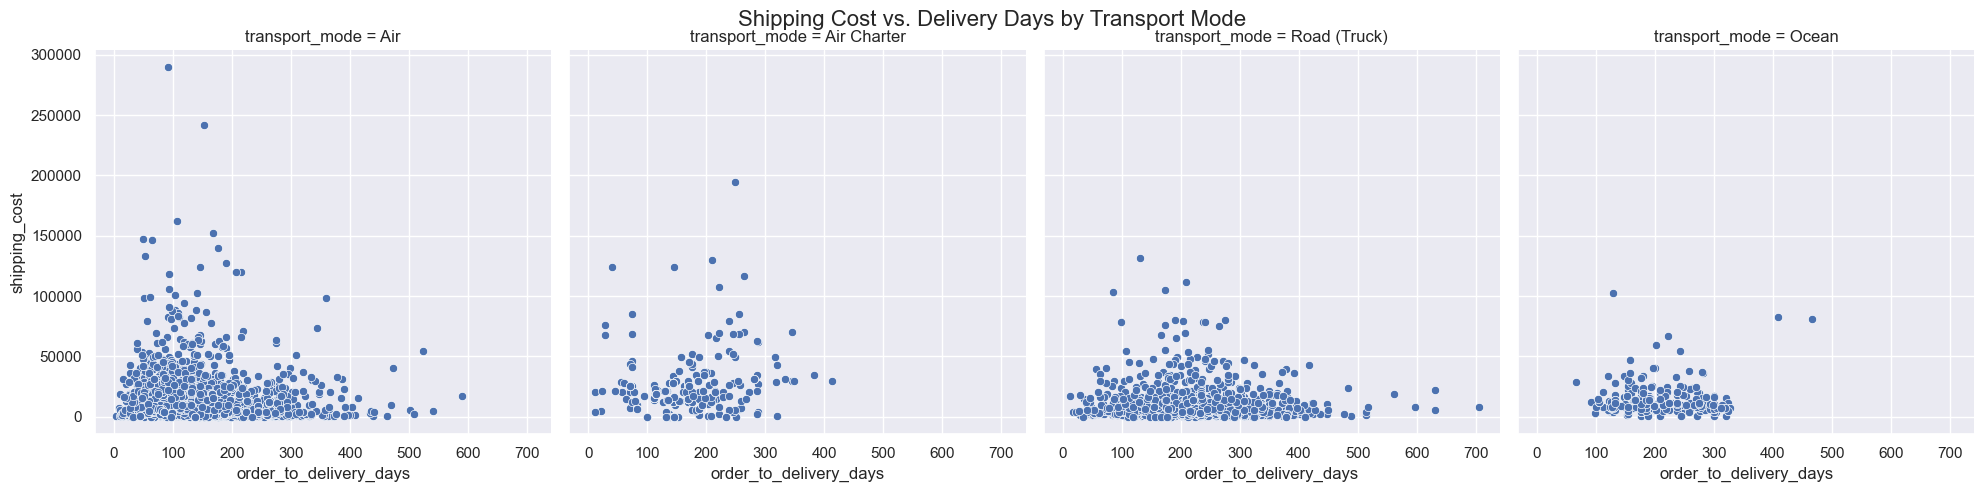

In [89]:
sns.relplot(x='order_to_delivery_days', y='shipping_cost', col='transport_mode', kind='scatter', data=data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Shipping Cost vs. Delivery Days by Transport Mode', fontsize=16)
plt.savefig("Shipping_Cost_&_Delivery_Days_by_Transport_Mode.png", dpi=150)
plt.show()

There seems to be a very sting positive relationships with the variables except for the case of total weight

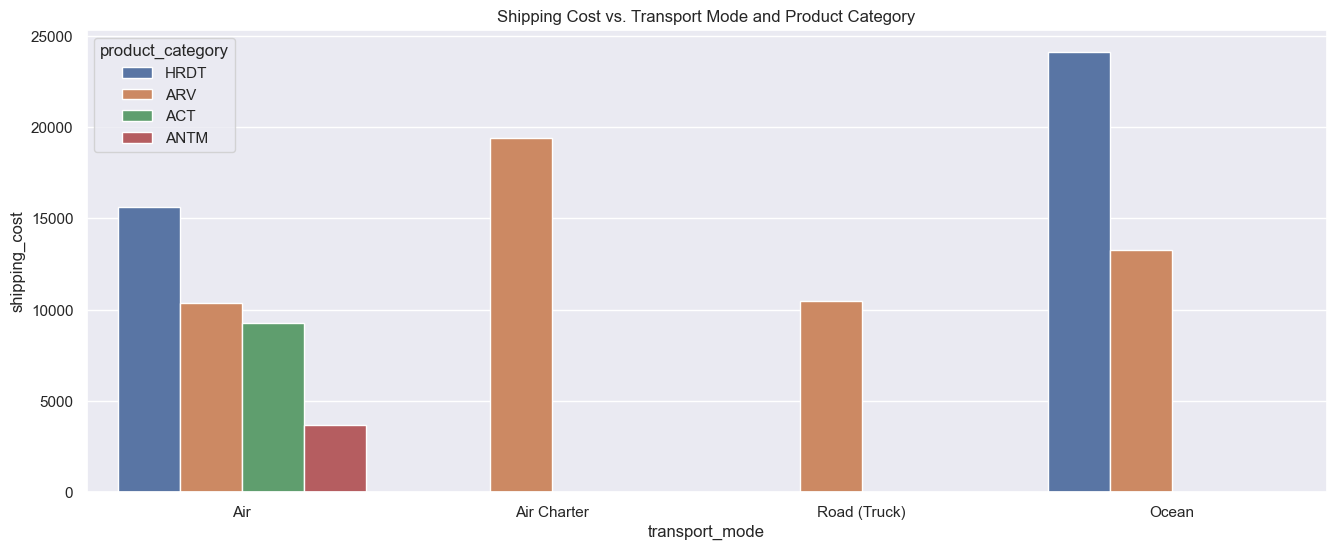

In [90]:
sns.barplot(x='transport_mode', y='shipping_cost', hue='product_category', data=data, ci=None)
plt.title('Shipping Cost vs. Transport Mode and Product Category');
plt.savefig("Shipping_Cost_by_Transport_Mode_&_Product_Category.png", dpi=150)

#### Delivery Method vs. Total quantities, Delivery status, Shipping cost, and Total Weight  

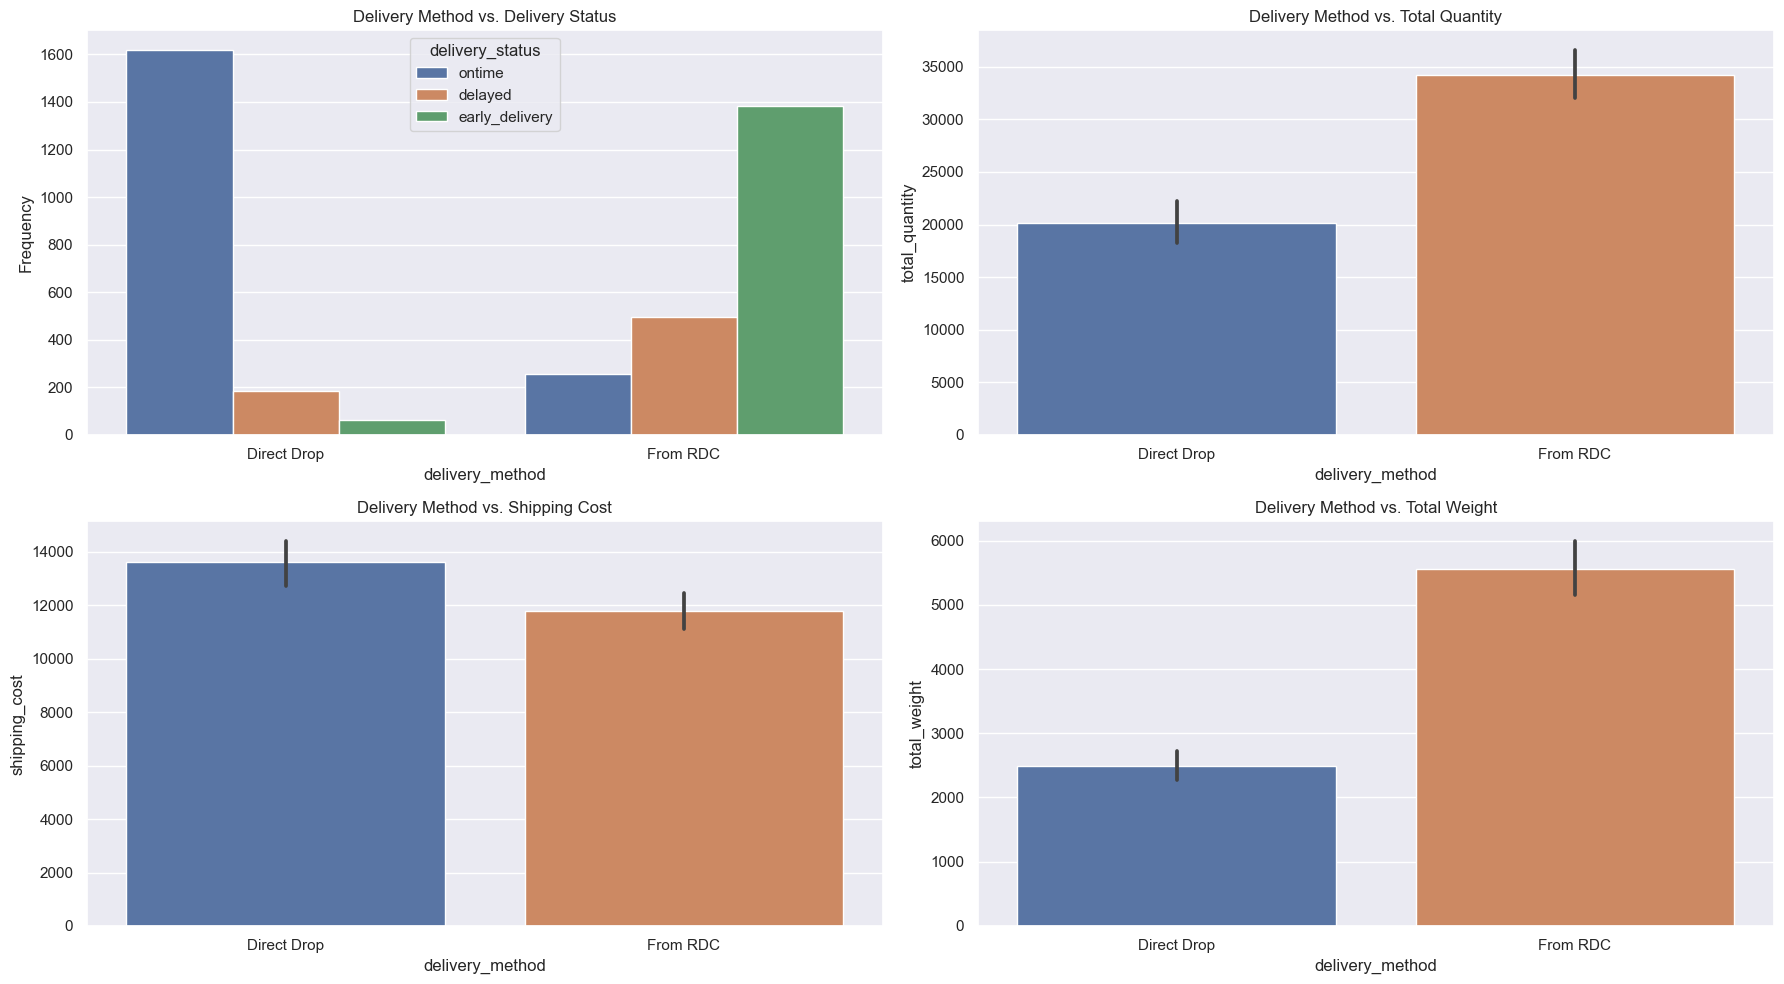

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Subplot 1: Delivery Method vs. Delivery Status
plt.subplot(2, 2, 1)
sns.countplot(x='delivery_method', hue='delivery_status', data=data)
plt.title('Delivery Method vs. Delivery Status')
plt.ylabel('Frequency')

# Subplot 2: Delivery Method vs. Total Quantity
plt.subplot(2, 2, 2)
sns.barplot(x='delivery_method', y='total_quantity', data=data)
plt.title('Delivery Method vs. Total Quantity')

# Subplot 3: Delivery Method vs. Shipping Cost
plt.subplot(2, 2, 3)
sns.barplot(x='delivery_method', y='shipping_cost', data=data)
plt.title('Delivery Method vs. Shipping Cost')

# Subplot 4: Delivery Method vs. Insurance Cost
plt.subplot(2, 2, 4)
sns.barplot(x='delivery_method', y='total_weight', data=data)
plt.title('Delivery Method vs. Total Weight')

# Adjust spacing between subplots
plt.tight_layout();

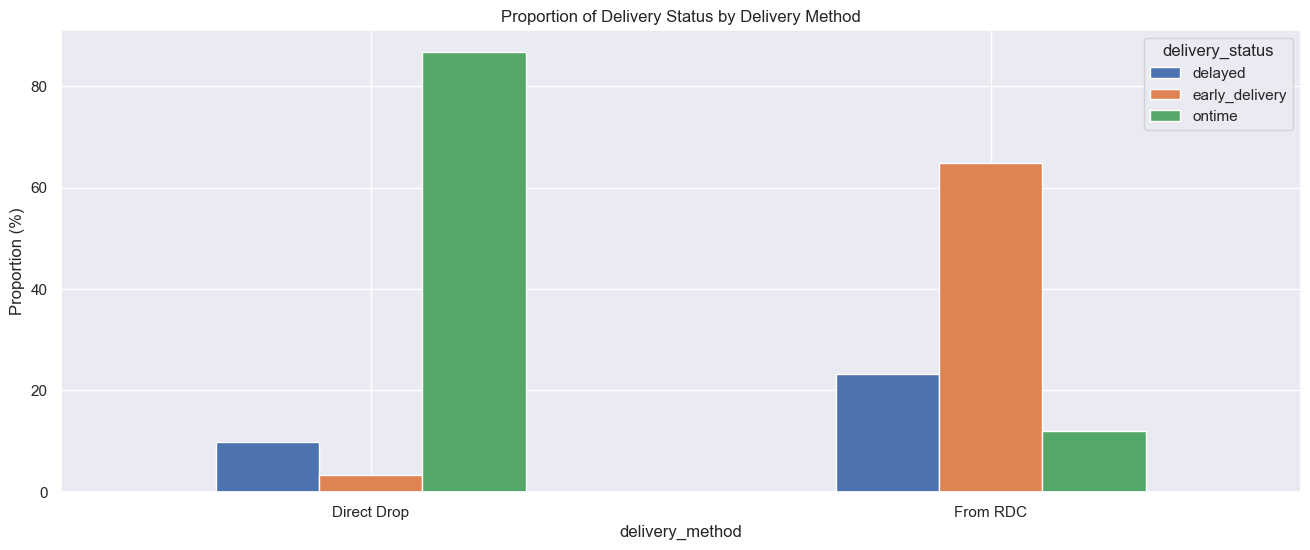

In [92]:
# Create a crosstab of counts
counts = pd.crosstab(data['delivery_method'], data['delivery_status'])

# Calculate proportions
proportions = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the proportions
proportions.plot(kind='bar', stacked=False)
plt.ylabel('Proportion (%)')
plt.title('Proportion of Delivery Status by Delivery Method')
plt.xticks(rotation=0);
plt.savefig("Delivery_Method_vs._Delivery_Status.png", dpi=150)

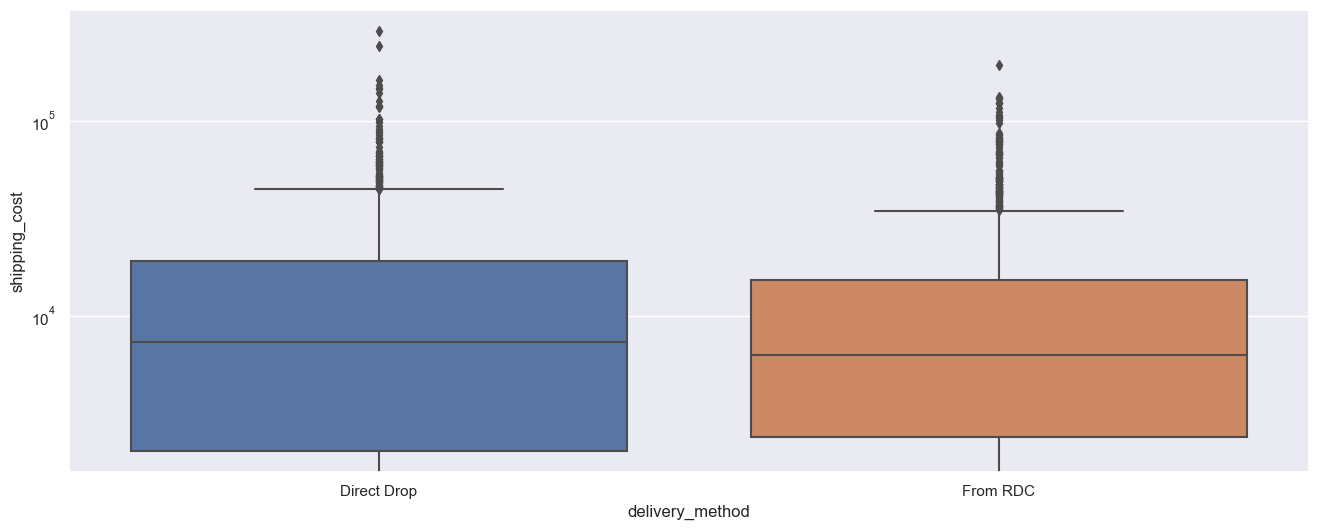

In [93]:
sns.boxplot(x='delivery_method', y='shipping_cost', data=data)
# plt.title('Delivery Method vs. Shipping Cost')
# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.savefig("Delivery_Method_versus_Shipping_Cost.png", dpi=150)

Checking whether the choice of delivery method affects order quanties, delivery status, shipping cost, and total weight and there's quite some observations to be made

#### Factory Location vs. Total quantities, Delivery status, Shipping cost, and Unit Price

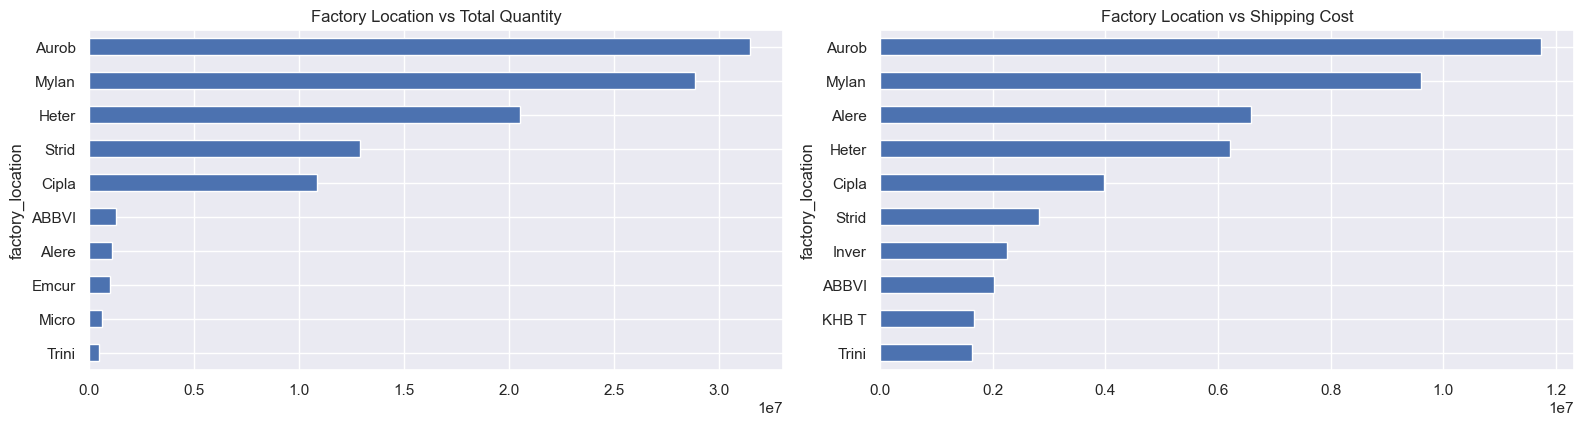

In [94]:
# Create subplots for each column
plt.subplot(2, 2, 1)
data.groupby(data['factory_location'].str[:5])['total_quantity'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(16,8), title="Factory Location vs Total Quantity")
plt.subplot(2, 2, 2)
data.groupby(data['factory_location'].str[:5])['shipping_cost'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(16,8), title='Factory Location vs Shipping Cost')
plt.tight_layout();

Does orders from certain factory locations affects the above features?

#### Country vs. Total quantities, and Shipping cost

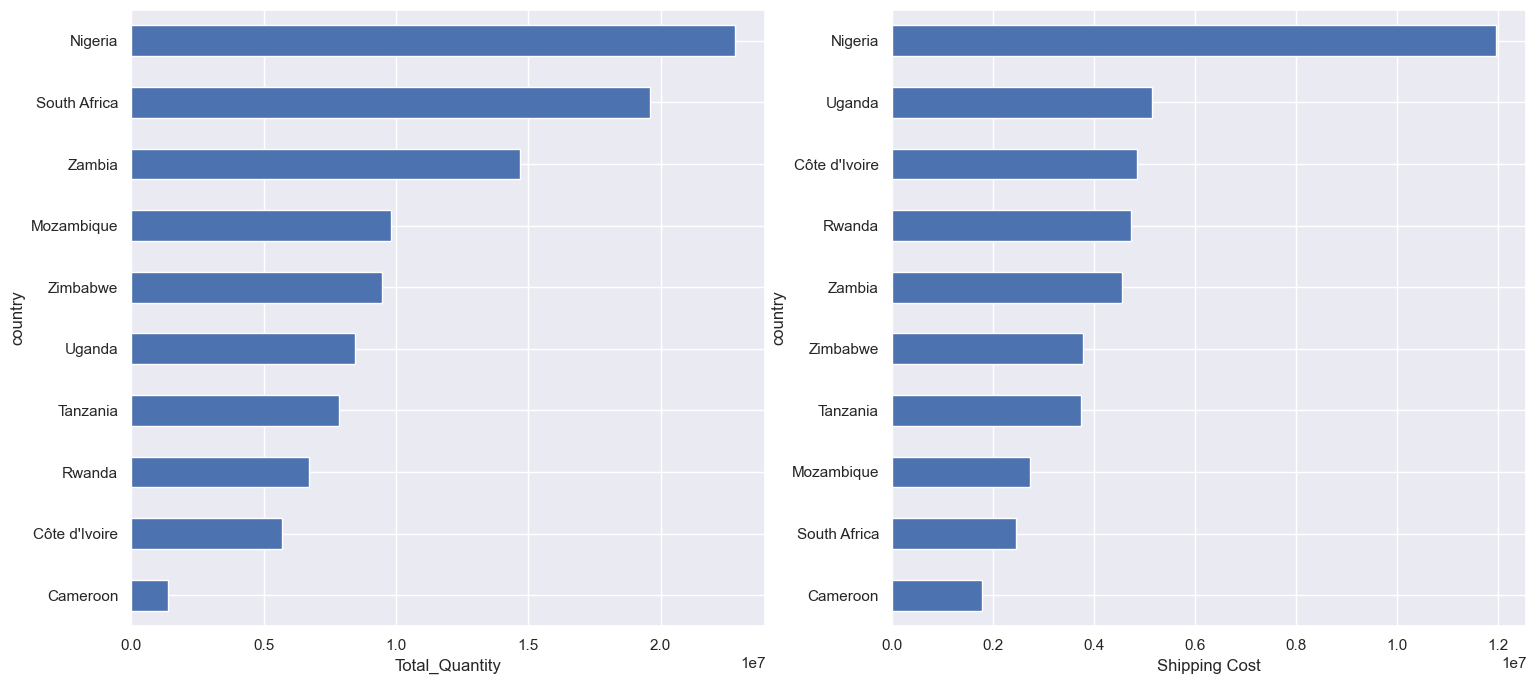

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
data.groupby(data['country'])['total_quantity'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(18,8), xlabel="Total_Quantity")
plt.subplot(1,2, 2)
data.groupby('country')['shipping_cost'].sum().sort_values(ascending=True).tail(10).plot.barh(figsize=(18,8), xlabel="Shipping Cost");
plt.savefig("Country_versus_total_quantity_&_shipping_cost.png", dpi=150)

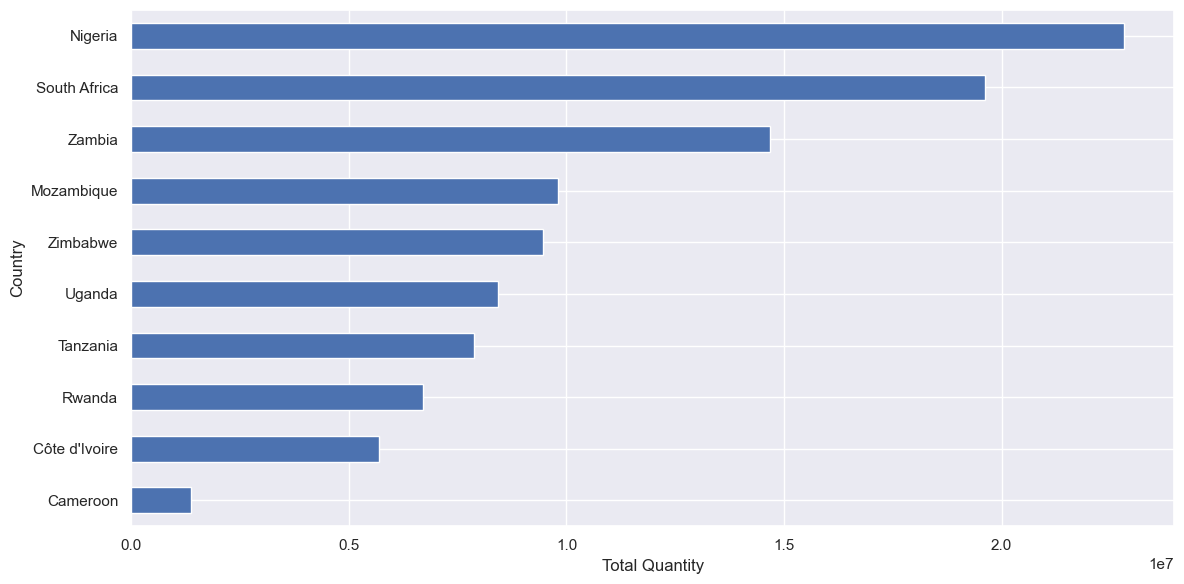

In [96]:
# Plot of Total Quantity by Country
plt.figure(figsize=(12, 6))
data.groupby('country')['total_quantity'].sum().sort_values(ascending=True).tail(10).plot.barh(color=sns.color_palette()[0])
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.tight_layout();
plt.savefig("Total_Quantity_by_Country.png", dpi=150)

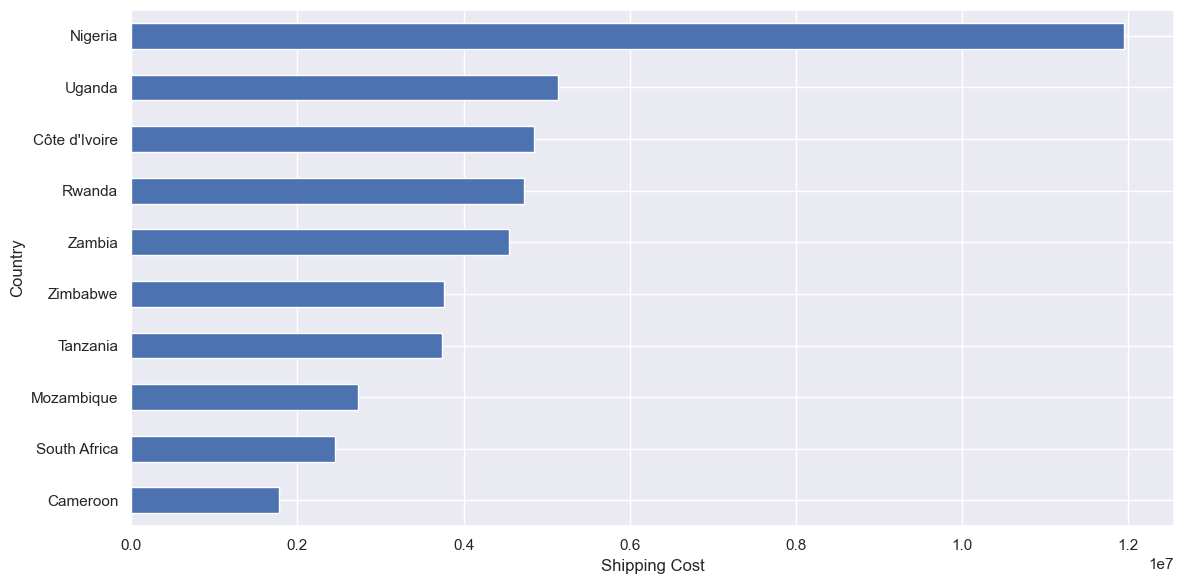

In [97]:
# Plot of Shipping Cost by Country
plt.figure(figsize=(12, 6))
data.groupby('country')['shipping_cost'].sum().sort_values(ascending=True).tail(10).plot.barh(color=sns.color_palette()[0])
plt.xlabel('Shipping Cost')
plt.ylabel('Country')
plt.tight_layout();
plt.savefig("Shipping_Cost_by_Country.png", dpi=150)

In [98]:
data['item_quantity(%)'] = round((data['total_quantity']/data['total_quantity'].sum()) *100,2)
data.groupby('country')[['total_value', 'shipping_cost', 'total_quantity', 'item_quantity(%)']].sum().sort_values(by='total_quantity', ascending=False)

total_value  shipping_cost  total_quantity  item_quantity(%)
country                                                                     
Nigeria        2.350808e+08    11956313.68        22822200             20.50
South Africa   8.685259e+07     2448839.39        19612427             17.79
Zambia         1.260923e+08     4543780.78        14682590             13.22
Mozambique     9.833784e+07     2729342.69         9798661              8.71
Zimbabwe       5.998806e+07     3768056.36         9462695              8.48
Uganda         6.918014e+07     5136085.08         8437360              7.41
Tanzania       7.800650e+07     3734619.25         7864091              6.98
Rwanda         4.996755e+07     4733241.54         6696106              5.93
Côte d'Ivoire  6.495703e+07     4848560.86         5687856              4.78
Cameroon       1.234366e+07     1783455.29         1379963              1.24
Ghana          5.546729e+06      552828.98         1112728              0.97
Ethiopia       6.162179e+06      822003.28          687008              0.57
Malawi         5.854456e+06      100420.13          501640              0.45
Swaziland      5.618971e+06      184695.88          471283              0.43
Namibia        3.571151e+06      332757.18          418612              0.36
Kenya          2.682669e+07     1313076.84          405032              0.42
Congo, DRC     2.777867e+06      698560.49          182601              0.12
Botswana       1.304211e+06      104173.41          112435              0.10
Benin          5.454805e+05       58191.29          103654              0.09
Burundi        2.277174e+06      312042.32           89240              0.05
South Sudan    6.998661e+05      249818.76           55463              0.03
Libya          1.128535e+05        8361.17           14233              0.01
Togo           1.532580e+05       12544.72           13042              0.02
Sierra Leone   3.200000e+05       28703.53            4000              0.00
Sudan          2.293064e+05       63334.97            3861              0.00
Angola         1.816000e+05       30832.07            3620              0.00
Lesotho        1.683200e+05       11063.78            2104              0.00
Mali           1.436500e+05       27663.90            1673              0.00
Liberia        1.028400e+05       19950.85            1455              0.00
Senegal        1.864000e+03         632.63             100              0.00
Guinea         3.600000e+03        1804.20              50              0.00

## Multivariate Analysis

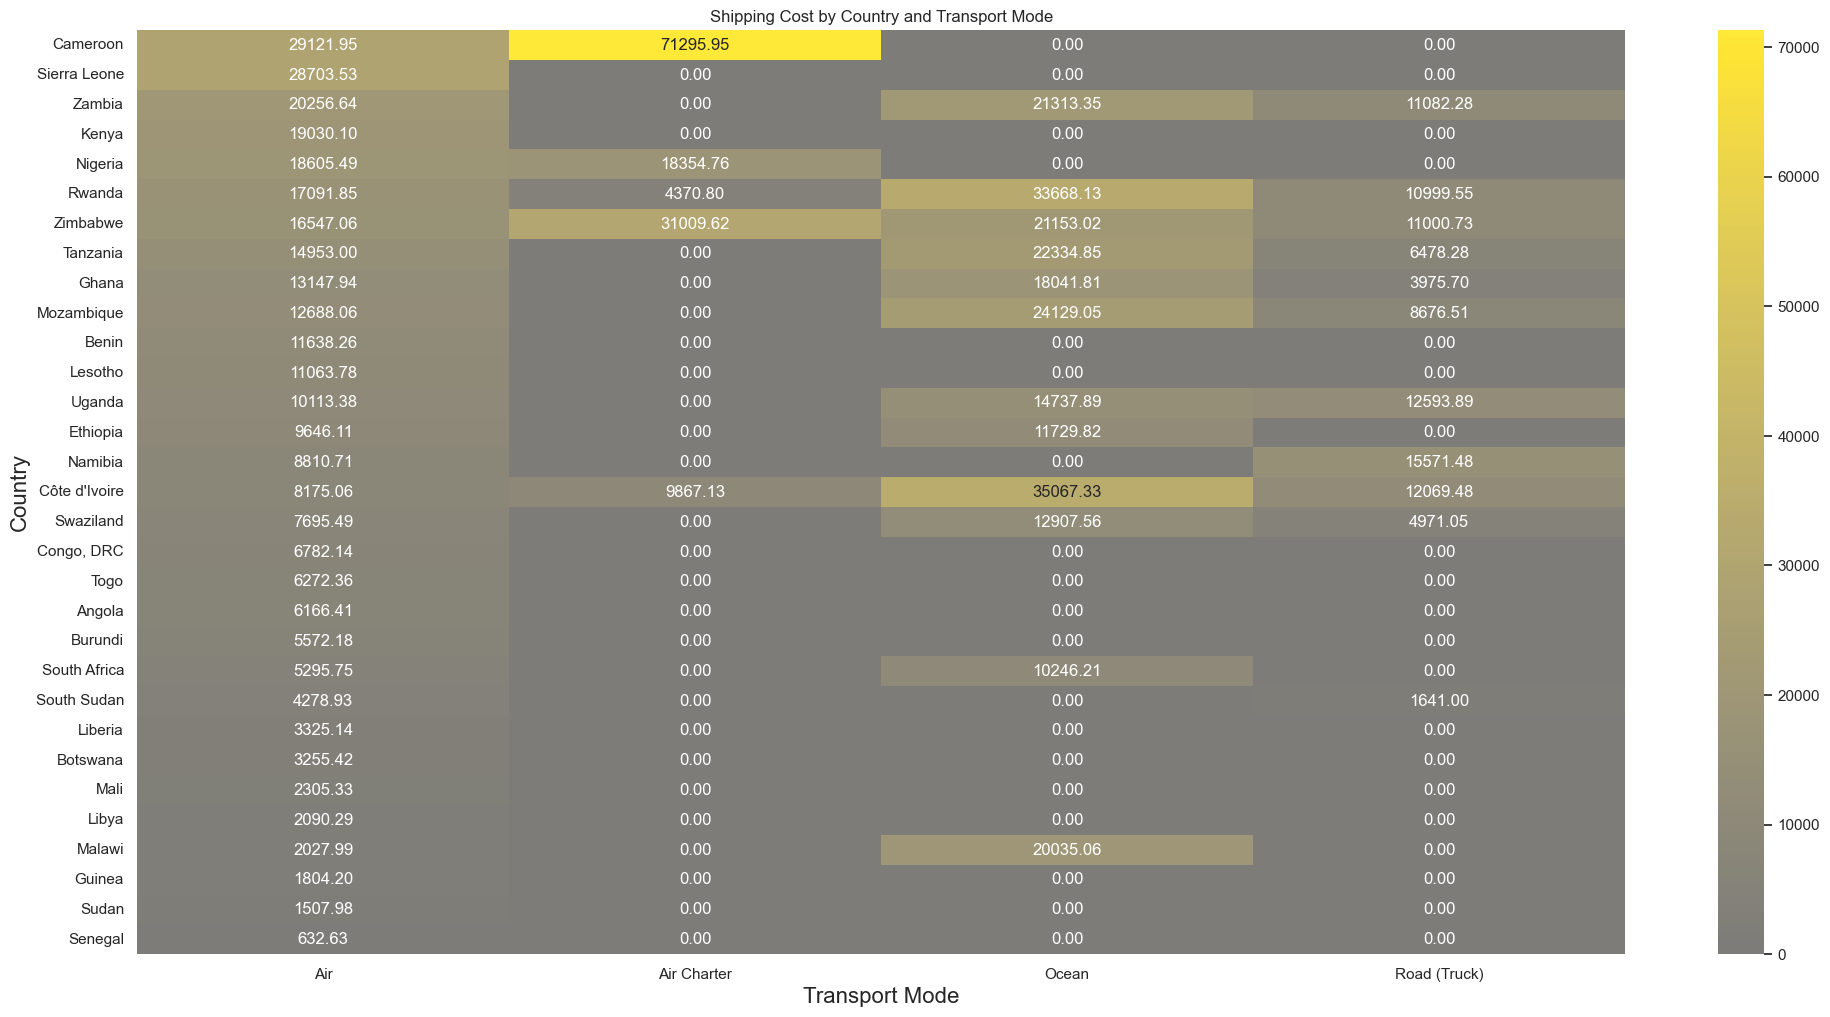

In [99]:
# Subset the qunatity of commodities  by the country and product category
interaction = data.pivot_table(index='country', columns='transport_mode', values='shipping_cost', aggfunc='mean', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction, center=0, annot=True, cmap='cividis', fmt='.2f')
plt.title('Shipping Cost by Country and Transport Mode')
plt.xlabel('Transport Mode', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Shipping_Cost_by_Transport_Mode_&_Country.png", dpi=150)

In [100]:
interaction.sort_values(by='Air')

transport_mode           Air   Air Charter         Ocean  Road (Truck)
country                                                               
Senegal           632.630000      0.000000      0.000000      0.000000
Sudan            1507.975476      0.000000      0.000000      0.000000
Guinea           1804.200000      0.000000      0.000000      0.000000
Malawi           2027.991000      0.000000  20035.055000      0.000000
Libya            2090.292500      0.000000      0.000000      0.000000
Mali             2305.325000      0.000000      0.000000      0.000000
Botswana         3255.419063      0.000000      0.000000      0.000000
Liberia          3325.141667      0.000000      0.000000      0.000000
South Sudan      4278.926897      0.000000      0.000000   1641.000000
South Africa     5295.746742      0.000000  10246.206891      0.000000
Burundi          5572.184286      0.000000      0.000000      0.000000
Angola           6166.414000      0.000000      0.000000      0.000000
Togo             6272.360000      0.000000      0.000000      0.000000
Congo, DRC       6782.140680      0.000000      0.000000      0.000000
Swaziland        7695.485500      0.000000  12907.560000   4971.050000
Côte d'Ivoire    8175.056967   9867.133333  35067.333333  12069.475697
Namibia          8810.713889      0.000000      0.000000  15571.480000
Ethiopia         9646.112619      0.000000  11729.820000      0.000000
Uganda          10113.380906      0.000000  14737.890000  12593.887862
Lesotho         11063.780000      0.000000      0.000000      0.000000
Benin           11638.258000      0.000000      0.000000      0.000000
Mozambique      12688.055287      0.000000  24129.053333   8676.506816
Ghana           13147.940256      0.000000  18041.805000   3975.700000
Tanzania        14953.000106      0.000000  22334.848000   6478.276341
Zimbabwe        16547.061975  31009.624706  21153.023333  11000.728443
Rwanda          17091.854641   4370.800000  33668.125789  10999.547447
Nigeria         18605.485020  18354.756667      0.000000      0.000000
Kenya           19030.099130      0.000000      0.000000      0.000000
Zambia          20256.639725      0.000000  21313.353333  11082.278000
Sierra Leone    28703.530000      0.000000      0.000000      0.000000
Cameroon        29121.950204  71295.946000      0.000000      0.000000

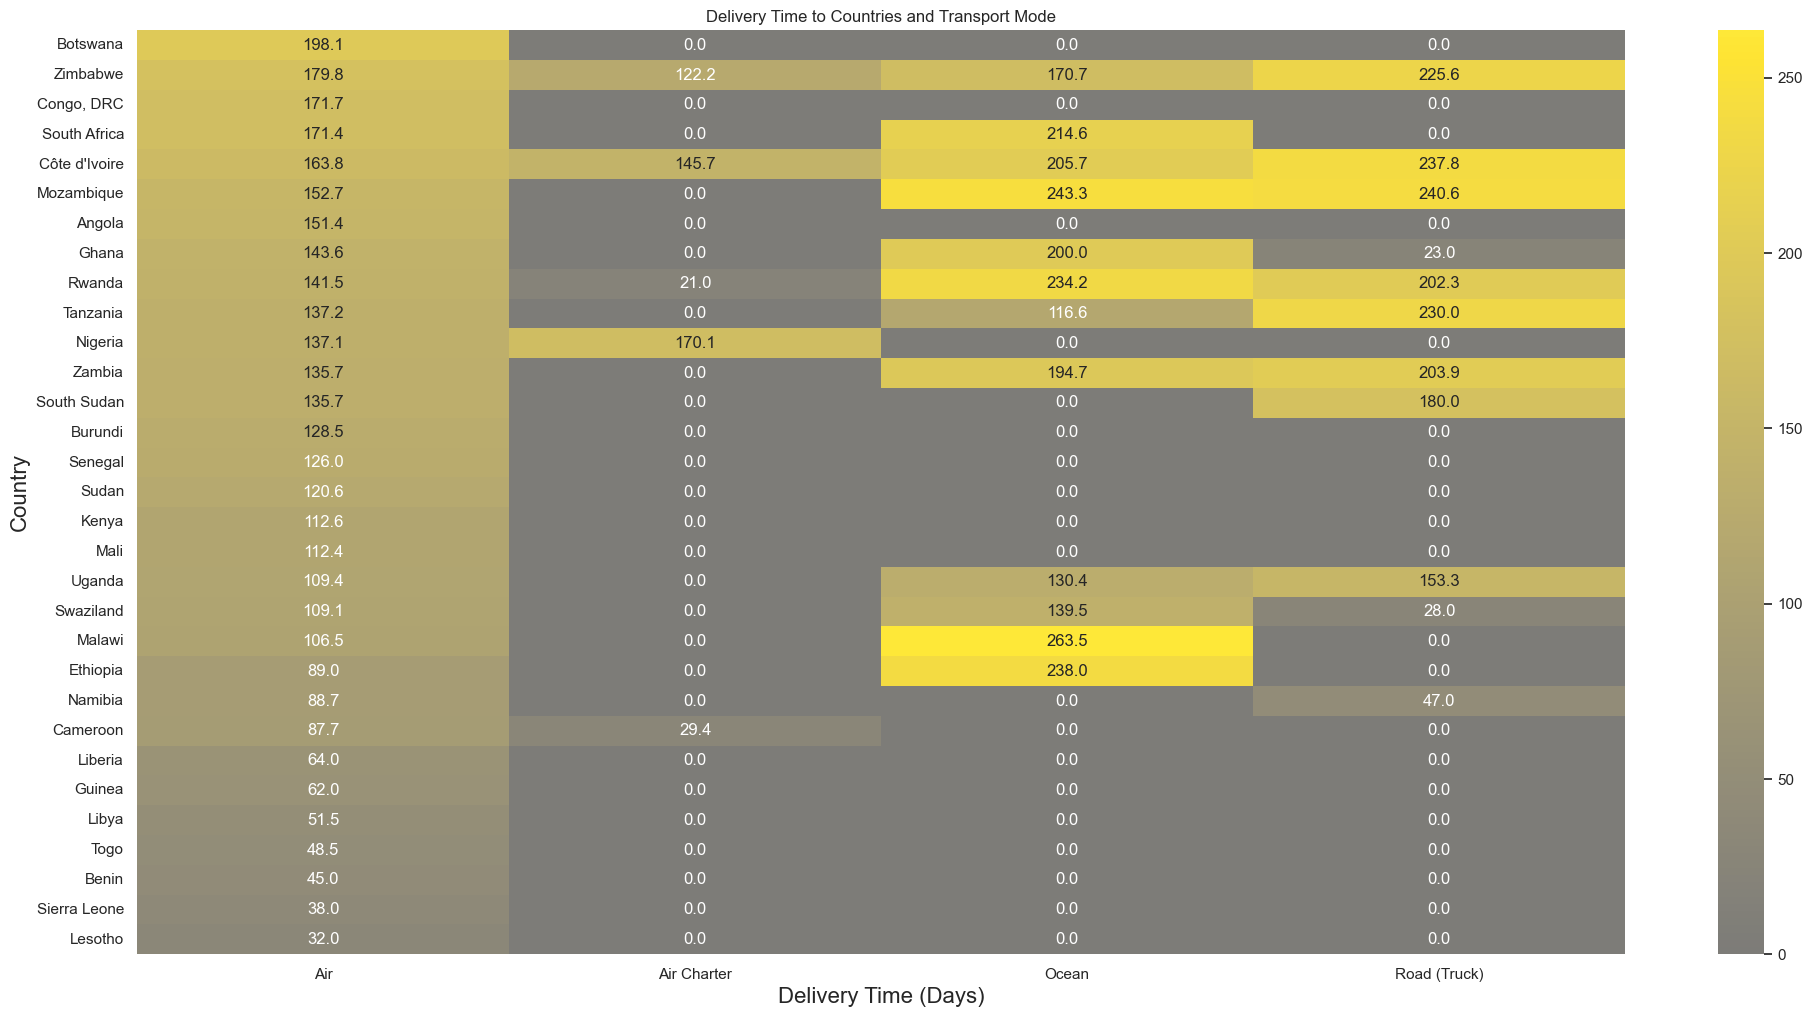

In [101]:
# Subset the qunatity of commodities  by the country and product category
interaction2 = data.pivot_table(index='country', columns='transport_mode', values='order_to_delivery_days', aggfunc='mean', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction2, center=0, annot=True, cmap='cividis', fmt='.1f')
plt.title('Delivery Time to Countries and Transport Mode')
plt.xlabel('Delivery Time (Days)', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Delivery_Time_Transport_Mode_&_Country.png", dpi=150)

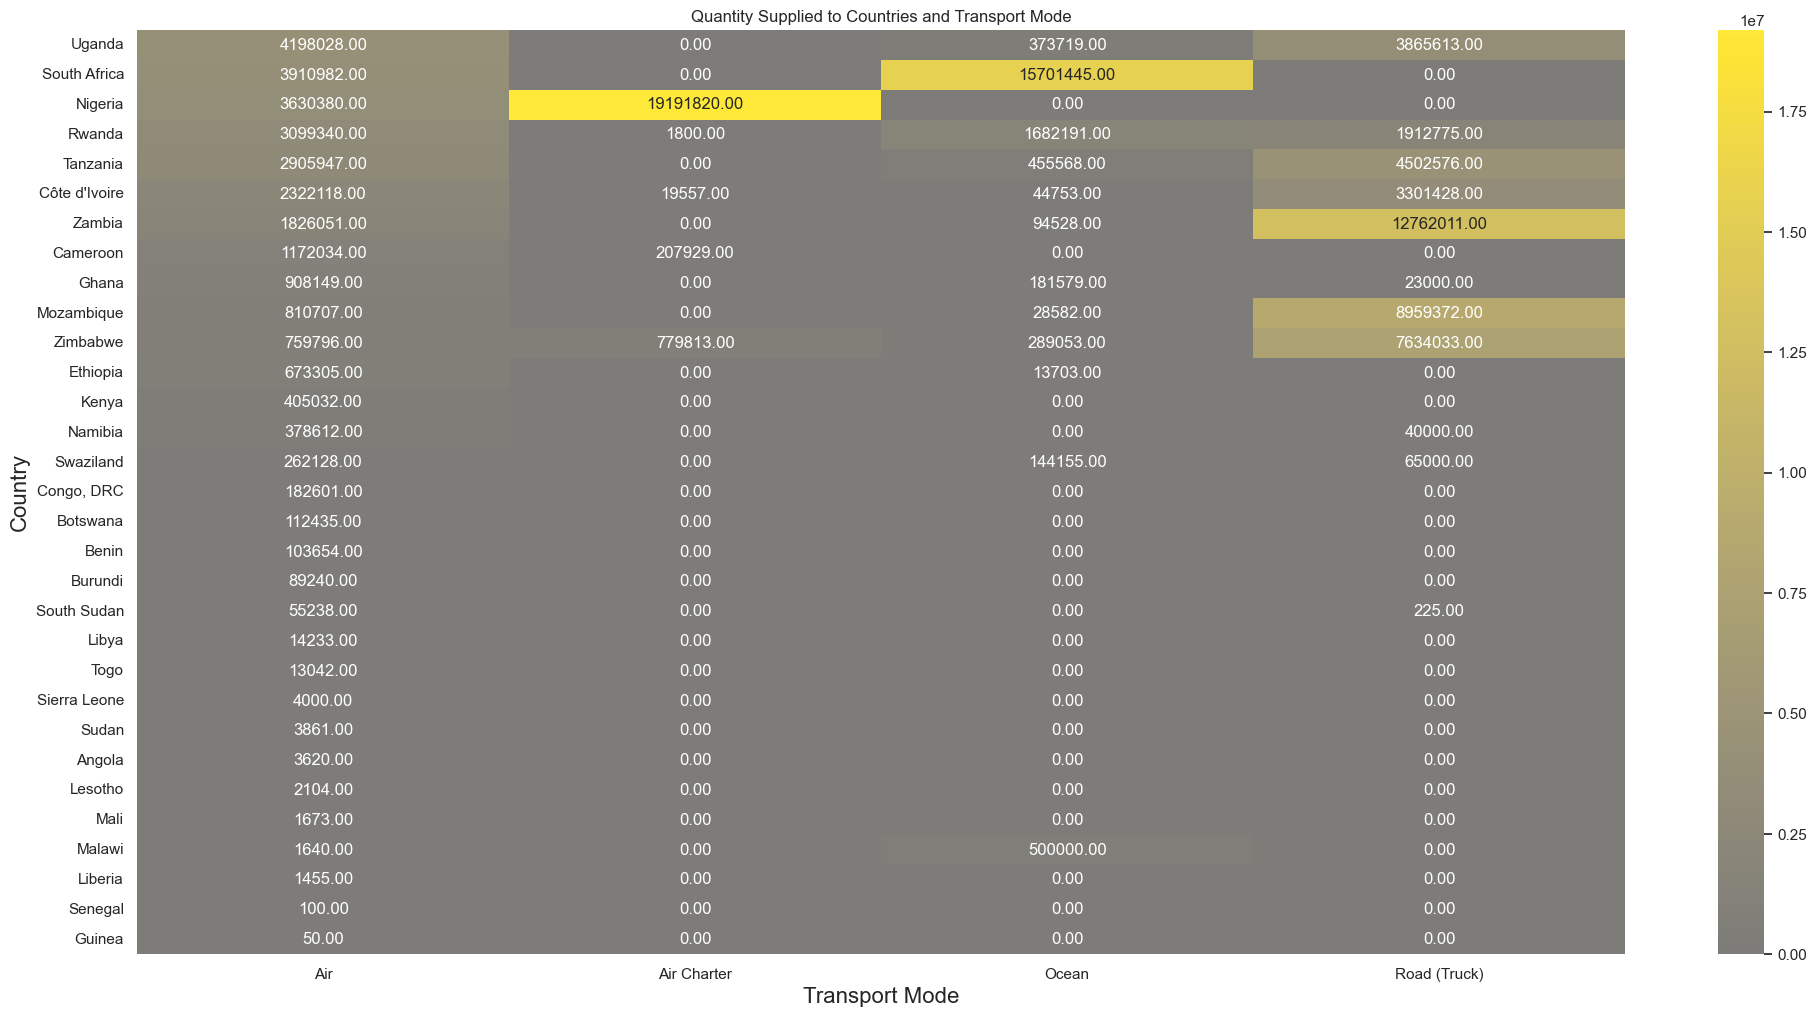

In [102]:
# Subset the qunatity of commodities  by the country and transport mode
interaction3 = data.pivot_table(index='country', columns='transport_mode', values='total_quantity', aggfunc='sum', fill_value=0).sort_values(by='Air', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(interaction3, center=0, annot=True, cmap='cividis', fmt='.2f')
plt.title('Quantity Supplied to Countries and Transport Mode')
plt.xlabel('Transport Mode', fontsize=16)
plt.ylabel('Country', fontsize=16);
plt.savefig("Quantity_by_Transport_Mode_&_Country.png", dpi=150)

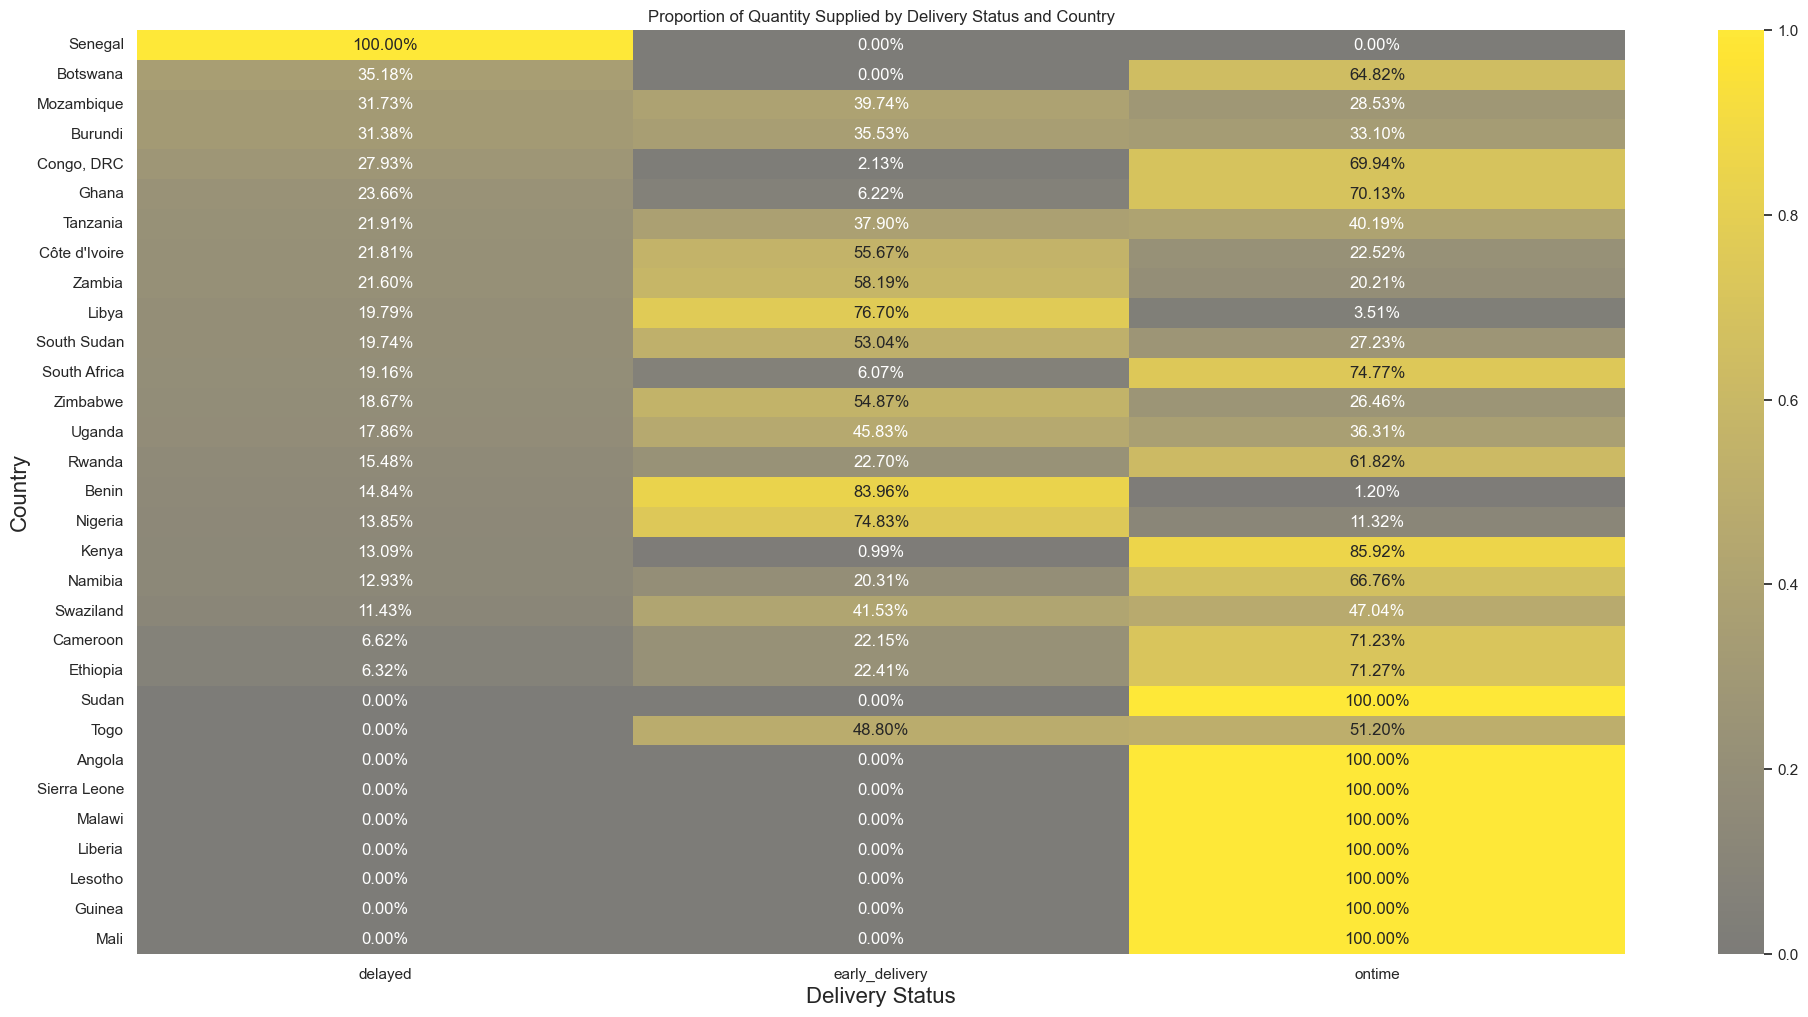

In [103]:
# Calculate the sum for each combination of country and delivery status
total_quantities = data.pivot_table(index='country', columns='delivery_status', values='total_quantity', aggfunc='sum', fill_value=0)

# Calculate the total quantity for each country
total_by_country = total_quantities.sum(axis=1)

# Calculate the proportion of each delivery status
proportions = total_quantities.divide(total_by_country, axis=0).sort_values(by='delayed', ascending=False)

# Plot
plt.figure(figsize=(24, 12))
sns.heatmap(proportions, center=0, annot=True, cmap='cividis', fmt='.2%')  # Use percentage format
plt.title('Proportion of Quantity Supplied by Delivery Status and Country')
plt.xlabel('Delivery Status', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.savefig("Proportion_by_Delivery_Status_&_Country.png", dpi=150)

In [104]:
data.groupby('transport_mode')[['total_quantity', 'shipping_cost', 'order_to_delivery_days']].mean()

total_quantity  shipping_cost  order_to_delivery_days
transport_mode                                                       
Air               12098.850999   12290.891499              137.310599
Air Charter       47531.574118   19390.972847              166.018824
Ocean             80285.086420   13421.123745              211.995885
Road (Truck)      41609.693720   10453.745449              214.562319

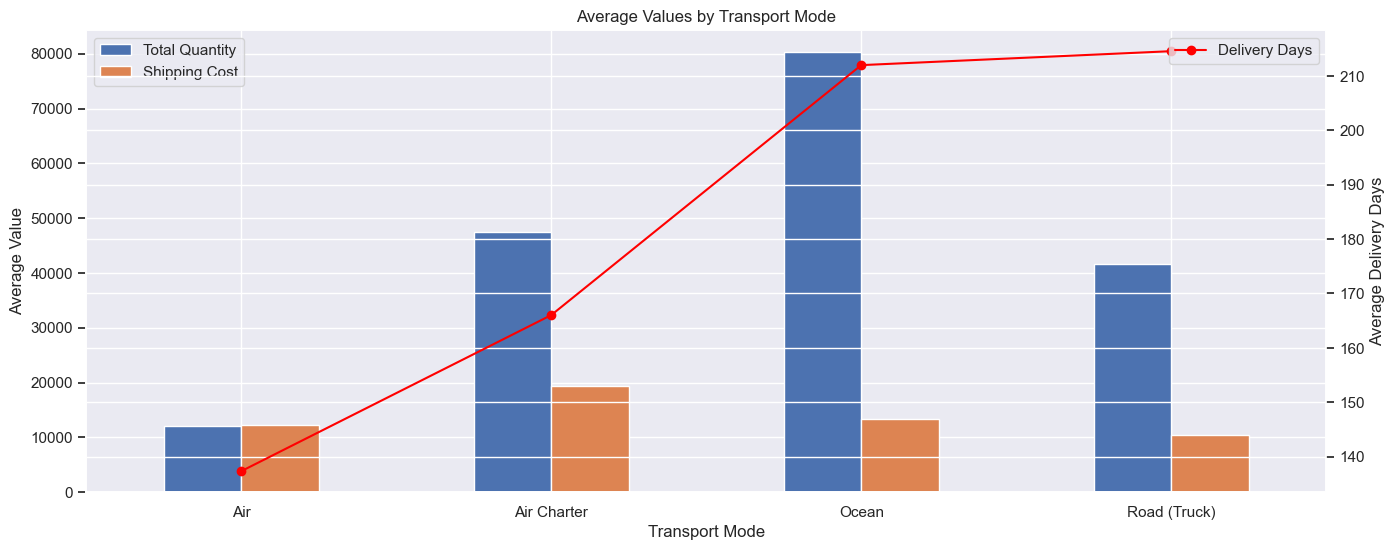

In [105]:
# Grouped bar chart
grouped_data = data.groupby('transport_mode')[['total_quantity', 'shipping_cost', 'order_to_delivery_days']].mean()

fig, ax1 = plt.subplots()

# Bar plot for total_quantity and shipping_cost
grouped_data[['total_quantity', 'shipping_cost']].plot(kind='bar', ax=ax1)
ax1.set_title('Average Values by Transport Mode')
ax1.set_xlabel('Transport Mode')
ax1.set_ylabel('Average Value')
ax1.set_xticklabels(grouped_data.index, rotation=0)
ax1.legend(['Total Quantity', 'Shipping Cost'], loc='upper left')

# Secondary axis for delivery_days using a line plot
ax2 = ax1.twinx()
grouped_data['order_to_delivery_days'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Delivery Days')
ax2.legend(['Delivery Days'], loc='upper right');

plt.savefig("Average_Values_with_Delivery_Days.png", dpi=150)

In [106]:
# Groupping ontime and early delivry as early_delivery
data['delivery_status'] = data['delivery_status'].replace({'ontime': 'early_delivery'})

In [107]:
cleaned_supply_chain_data = data.to_csv("cleaned_supply_chain_data.csv")